## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways. 

 

In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

**Project Pipeline**
- Data Understanding
- Exploratory data Analysis(EDA)
- Train/Test Split
- Model Building/hyperparameter tuning
- Model evaluation

In [1]:
# Importing all neccessary packages required
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer, PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.metrics import roc_curve, roc_auc_score


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#Checking the fraud/Non_Fraud related records
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
#finding the percentage values of class
(df.groupby('Class')['Class'].count()/df['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [9]:
#checking if there are any null values in dataset given 
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
#observing the different feature type present in the data
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [11]:
# correlation matrix
cor_matrix_data = df.corr()
cor_matrix_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


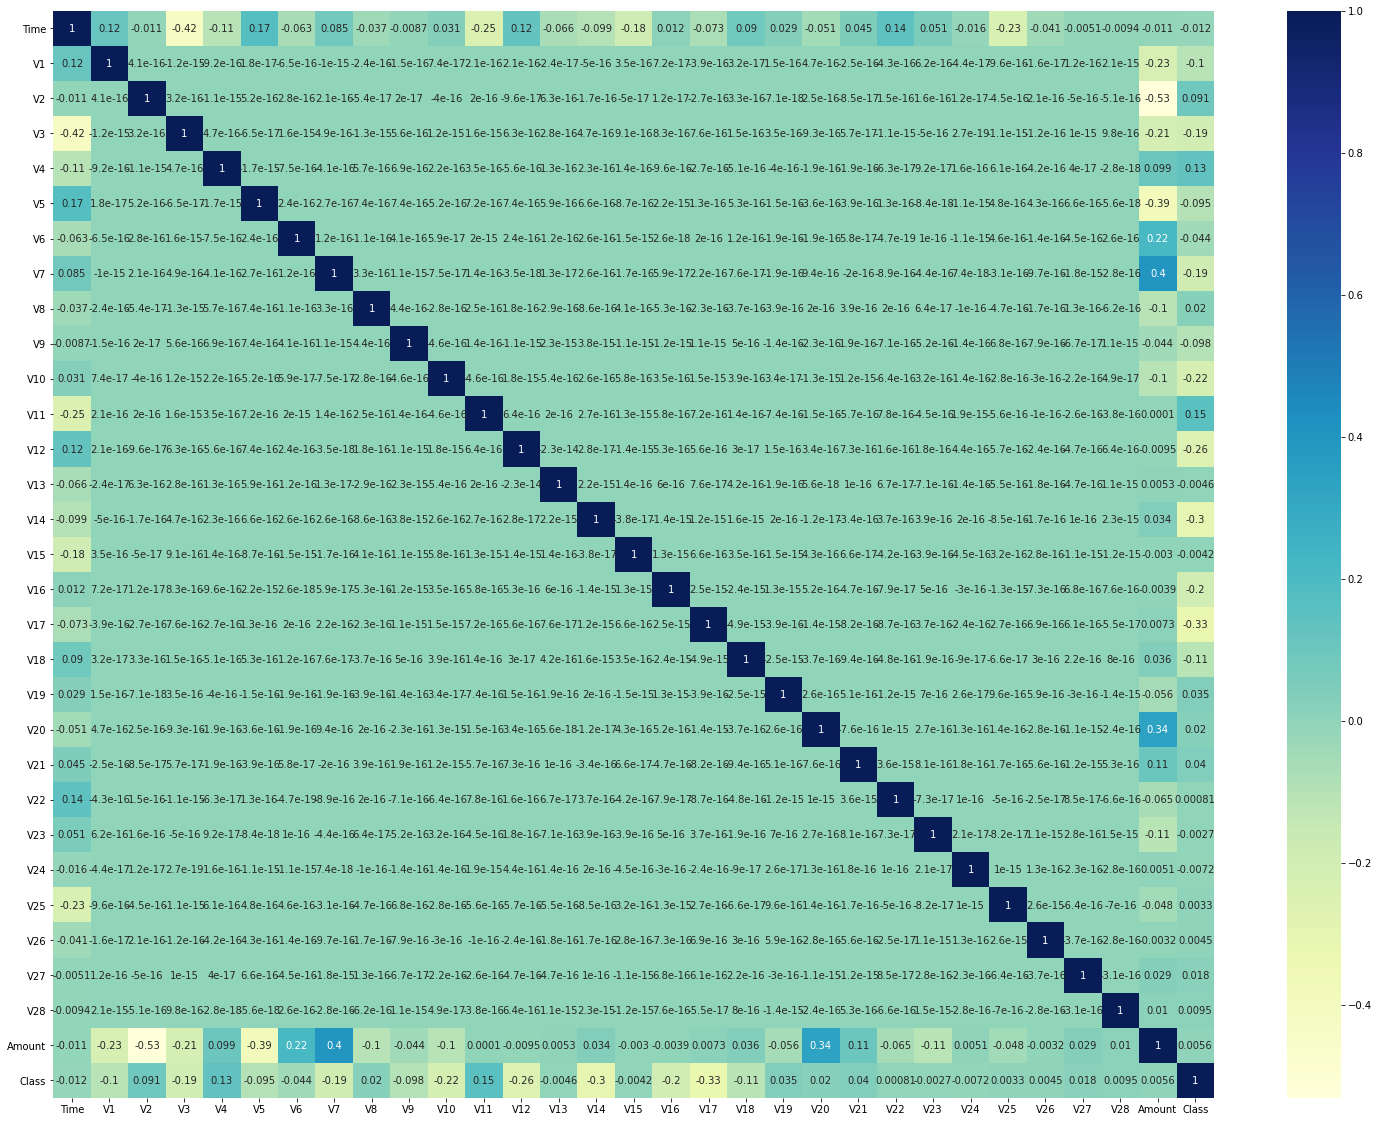

In [12]:
# plotting correlations on a heatmap
plt.figure(figsize=(26,20))
sns.heatmap(data = cor_matrix_data, cmap="YlGnBu", annot=True)
plt.show()

Here we will observe the distribution of our classes

In [13]:
classes = df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

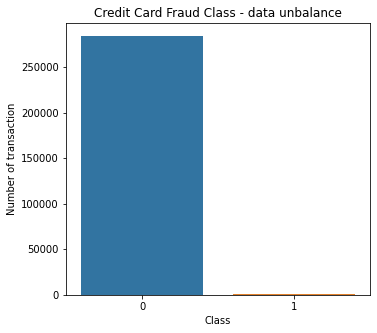

In [14]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")
plt.show()


Distribution of the Fraudalent vs Non-fraudalent transaction in Percentages


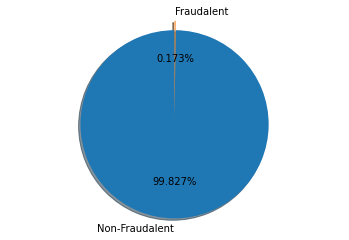

In [15]:
labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.3f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
print('Distribution of the Fraudalent vs Non-fraudalent transaction in Percentages')

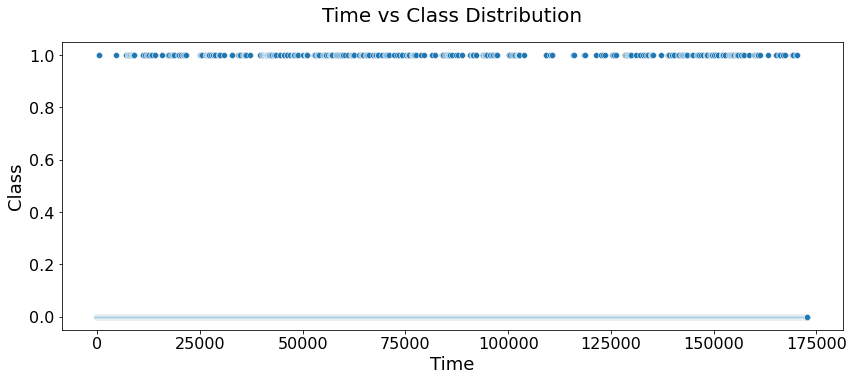

In [16]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set1')
plt.subplot(3,1,1)
sns.scatterplot(x=df['Time'], y='Class', palette=cmap, data=df)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Time vs Class Distribution', size=20, y=1.05)
plt.show()

<AxesSubplot:title={'center':'Distribution of Transaction Time'}, ylabel='Density'>

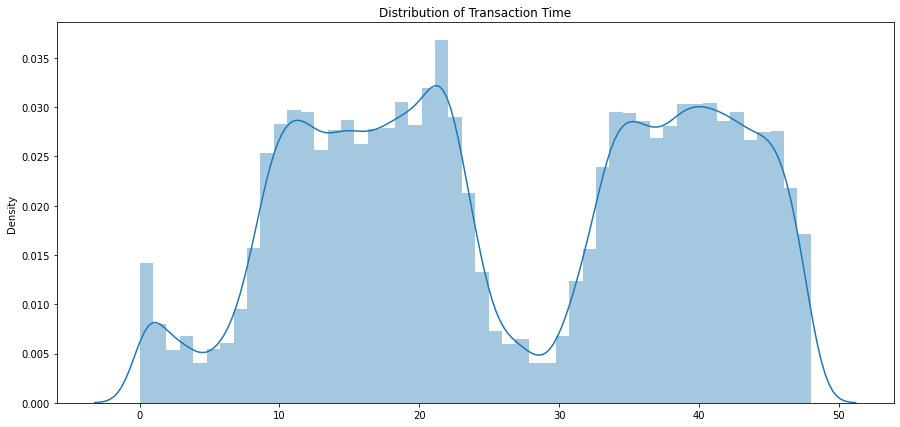

In [17]:
plt.figure(figsize = (15,7))

plt.title('Distribution of Transaction Time')
sns.distplot(df['Time'].values/(60*60))

In [18]:
df_Fraud = df[df['Class'] == 1]
df_Regular = df[df['Class'] == 0]

In [19]:
#Statistics of Fraud transactions amounts in dataset
df_Fraud["Amount"].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
#Statistics of Regular transactions amounts in dataset
df_Regular["Amount"].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

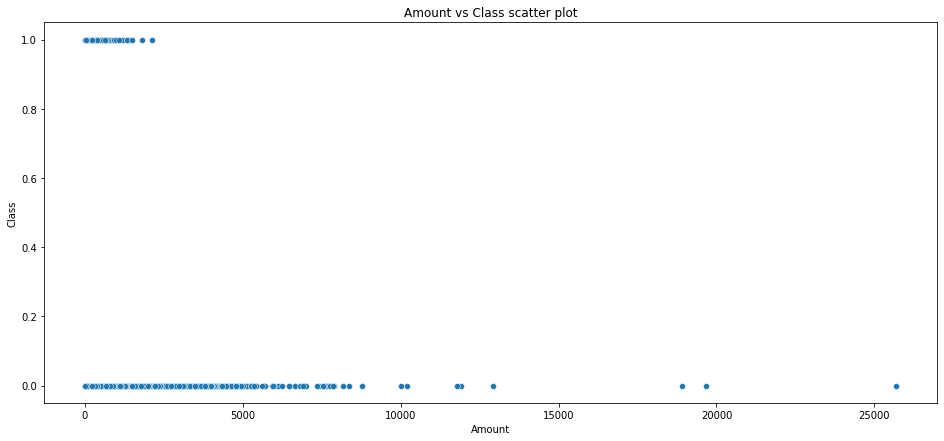

In [21]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize = (16, 7))
sns.scatterplot(df["Amount"], df["Class"]) 
plt.title("Amount vs Class scatter plot")
plt.show()

In [22]:
# Drop unnecessary columns
# Dropping the Time column
df.drop('Time', axis = 1, inplace = True)

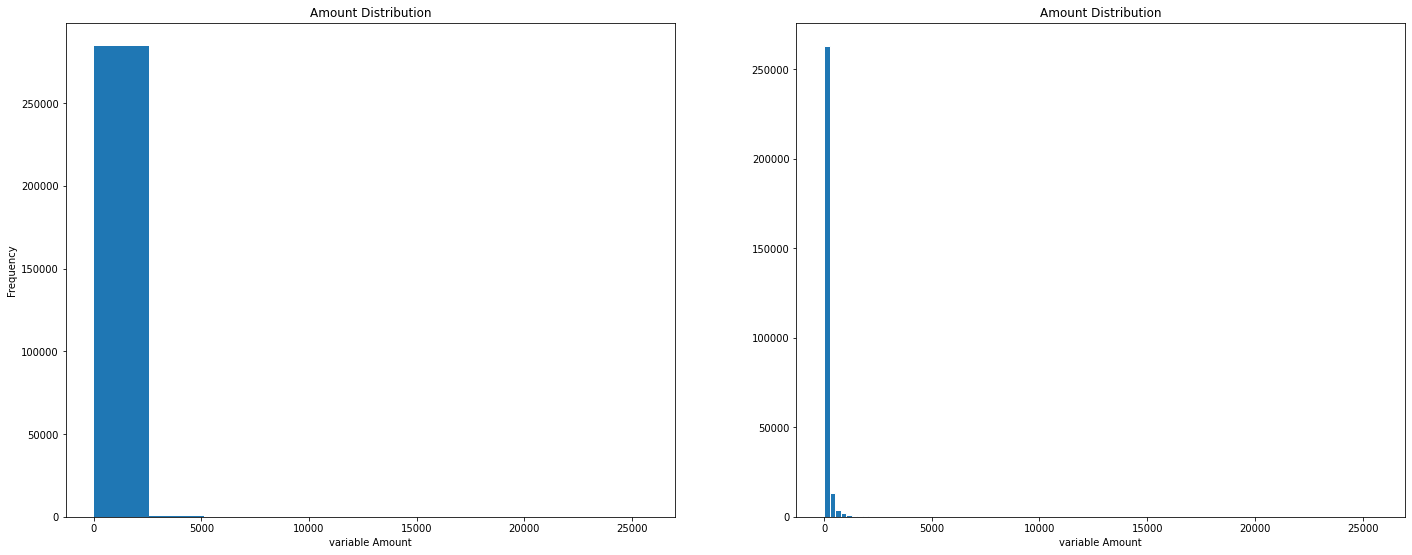

In [23]:
#Understading the Amount variable
plt.figure(figsize = (24, 20))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df['Amount'].astype(int).plot.hist();
plt.xlabel("variable Amount")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df['Amount'],bins=100)
plt.show()

### Splitting the data into train & test data

In [24]:
y= df['Class'] #class variable
X = df.drop(['Class'], axis = 1)

In [25]:
from sklearn import model_selection
# Splitting the data set into train size of 0.8 and test size=0.2 with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state = 42,train_size = 0.8, 
                                                    test_size = 0.20, stratify = y)

#### feature scaling on Amount variable as other variables have already been PCA performed.

In [26]:
from sklearn.preprocessing import StandardScaler
# Instantiating the StandardScaler
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [27]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


In [28]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.322494
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.339764
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,0.346693
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.327360
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,-0.008281


In [29]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,...,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,-0.259954
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,...,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.304426
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,...,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,-0.048286
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,...,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.347741
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,...,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.345707


In [30]:
cols = list(X.columns.values)
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

### Plotting the distribution of a variable

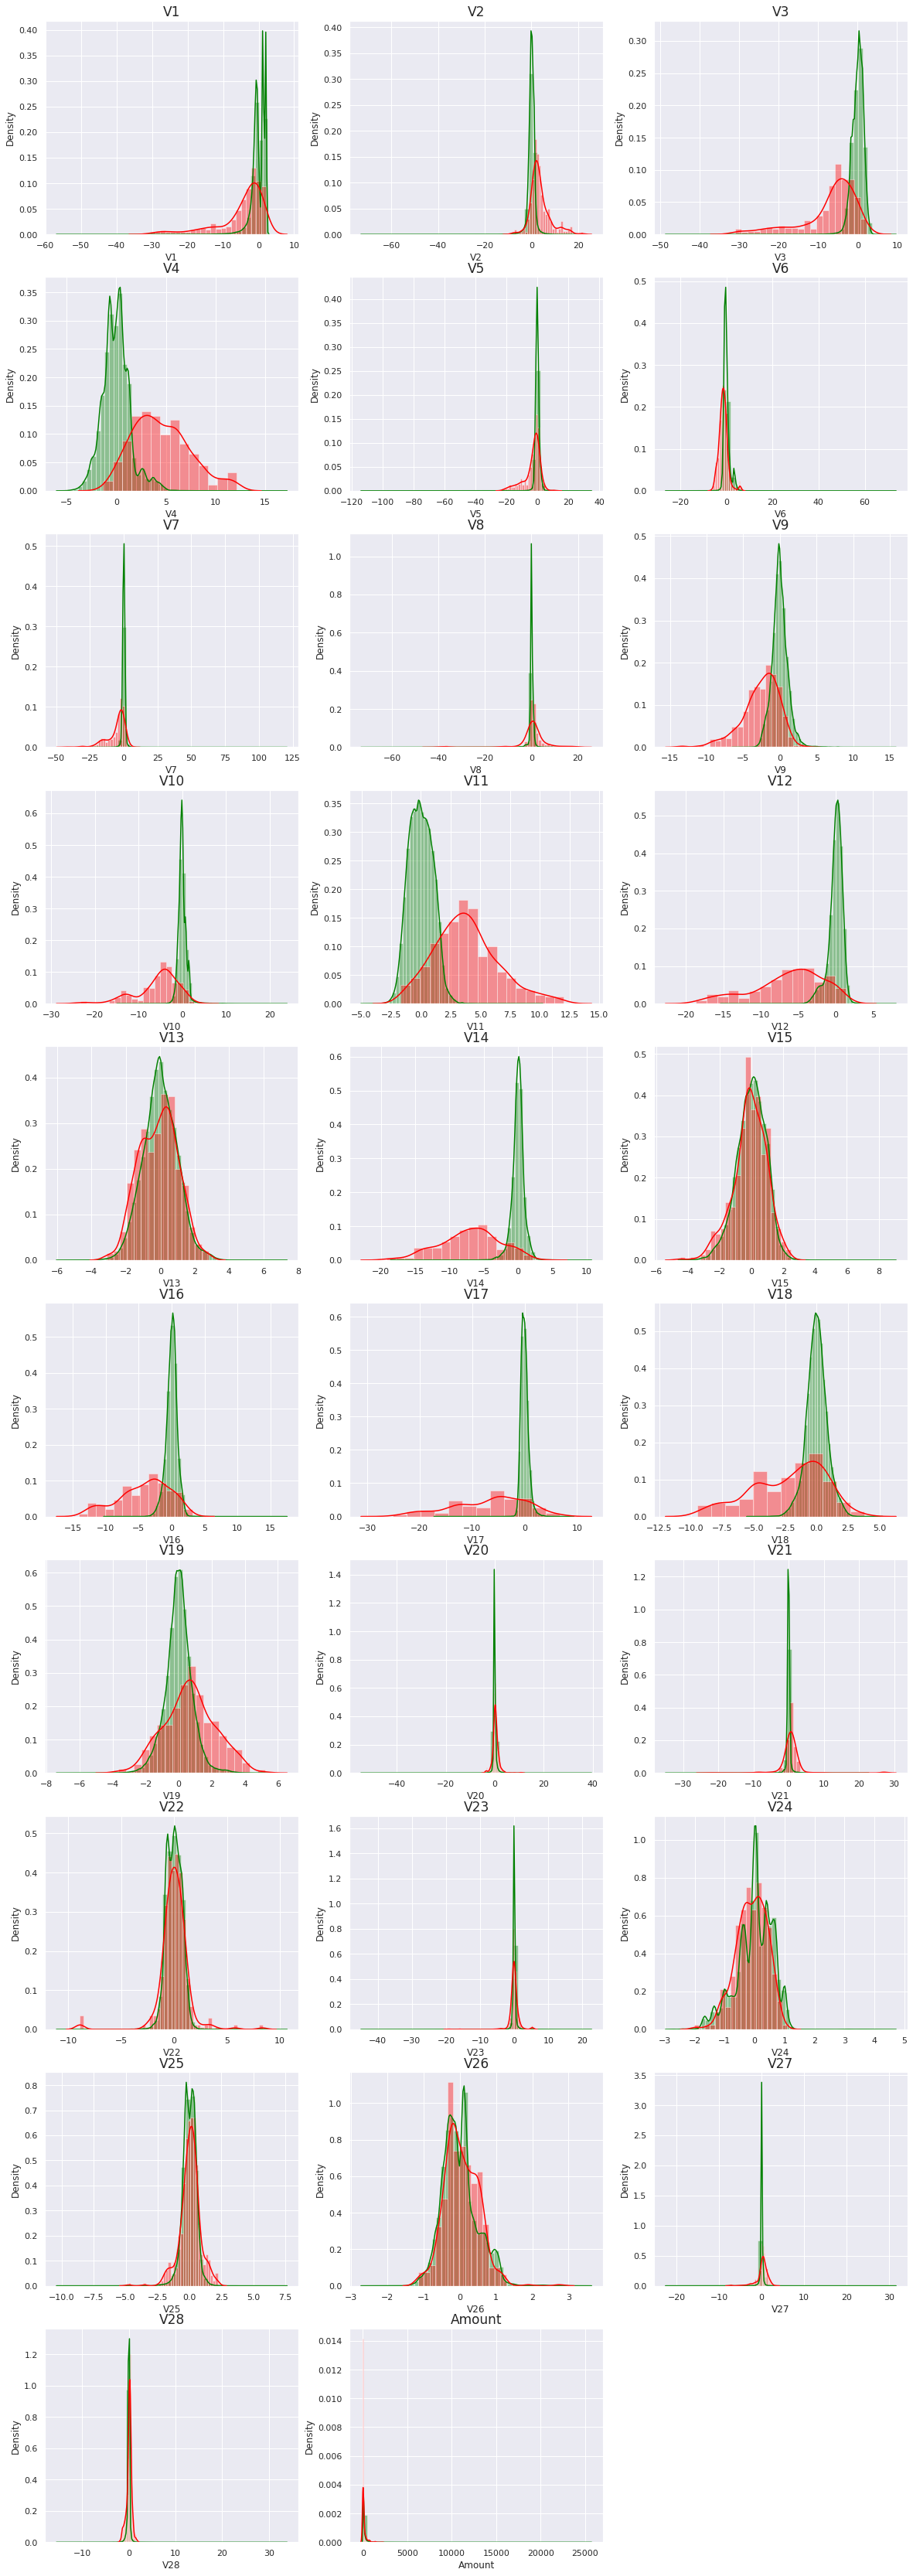

In [31]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [32]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)                      
X_train[cols]= pt.fit_transform(X_train)    
X_test[cols] = pt.transform(X_test)

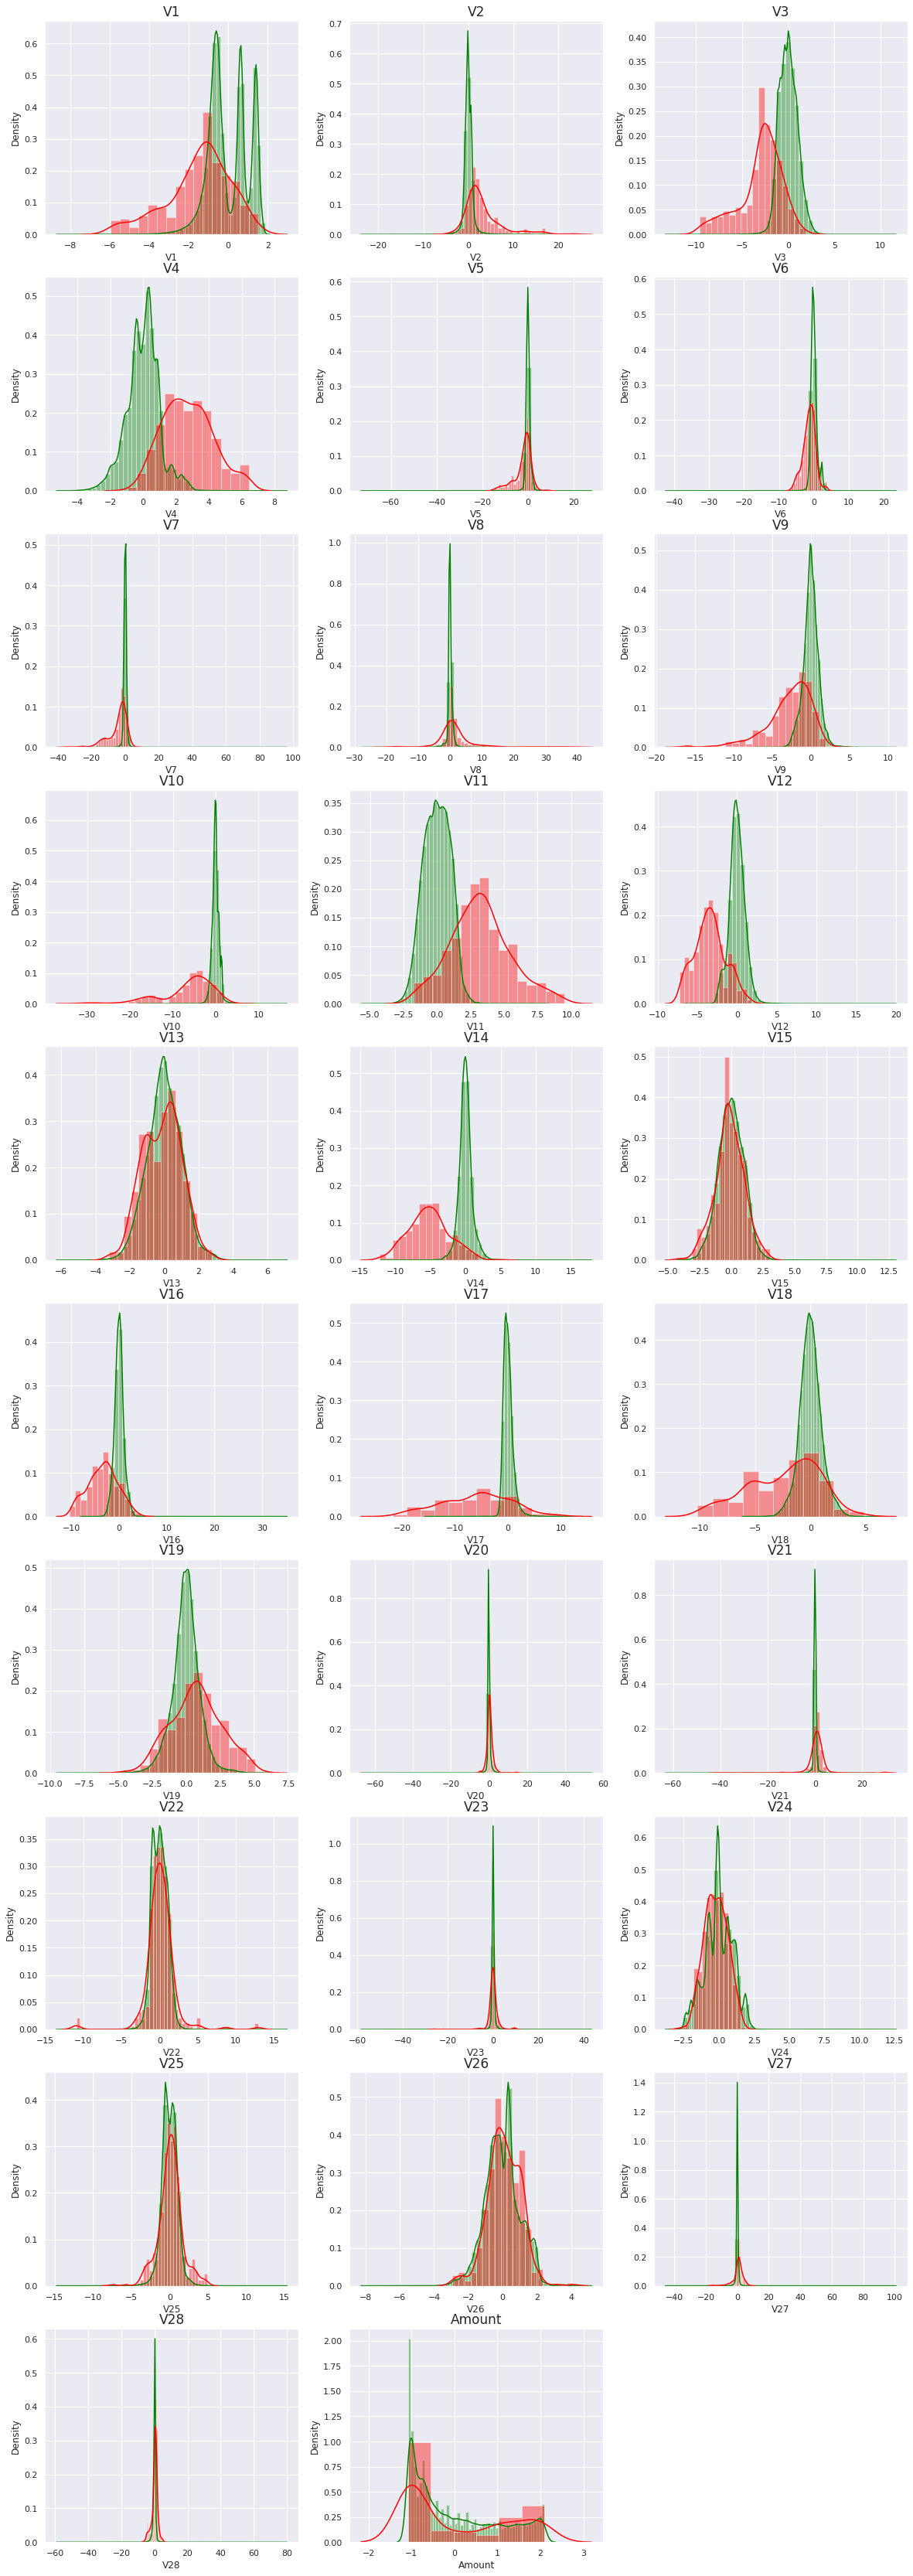

In [33]:
# plot the histogram of a variable from the train dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train[col][normal_records], color='green')
  sns.distplot(X_train[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

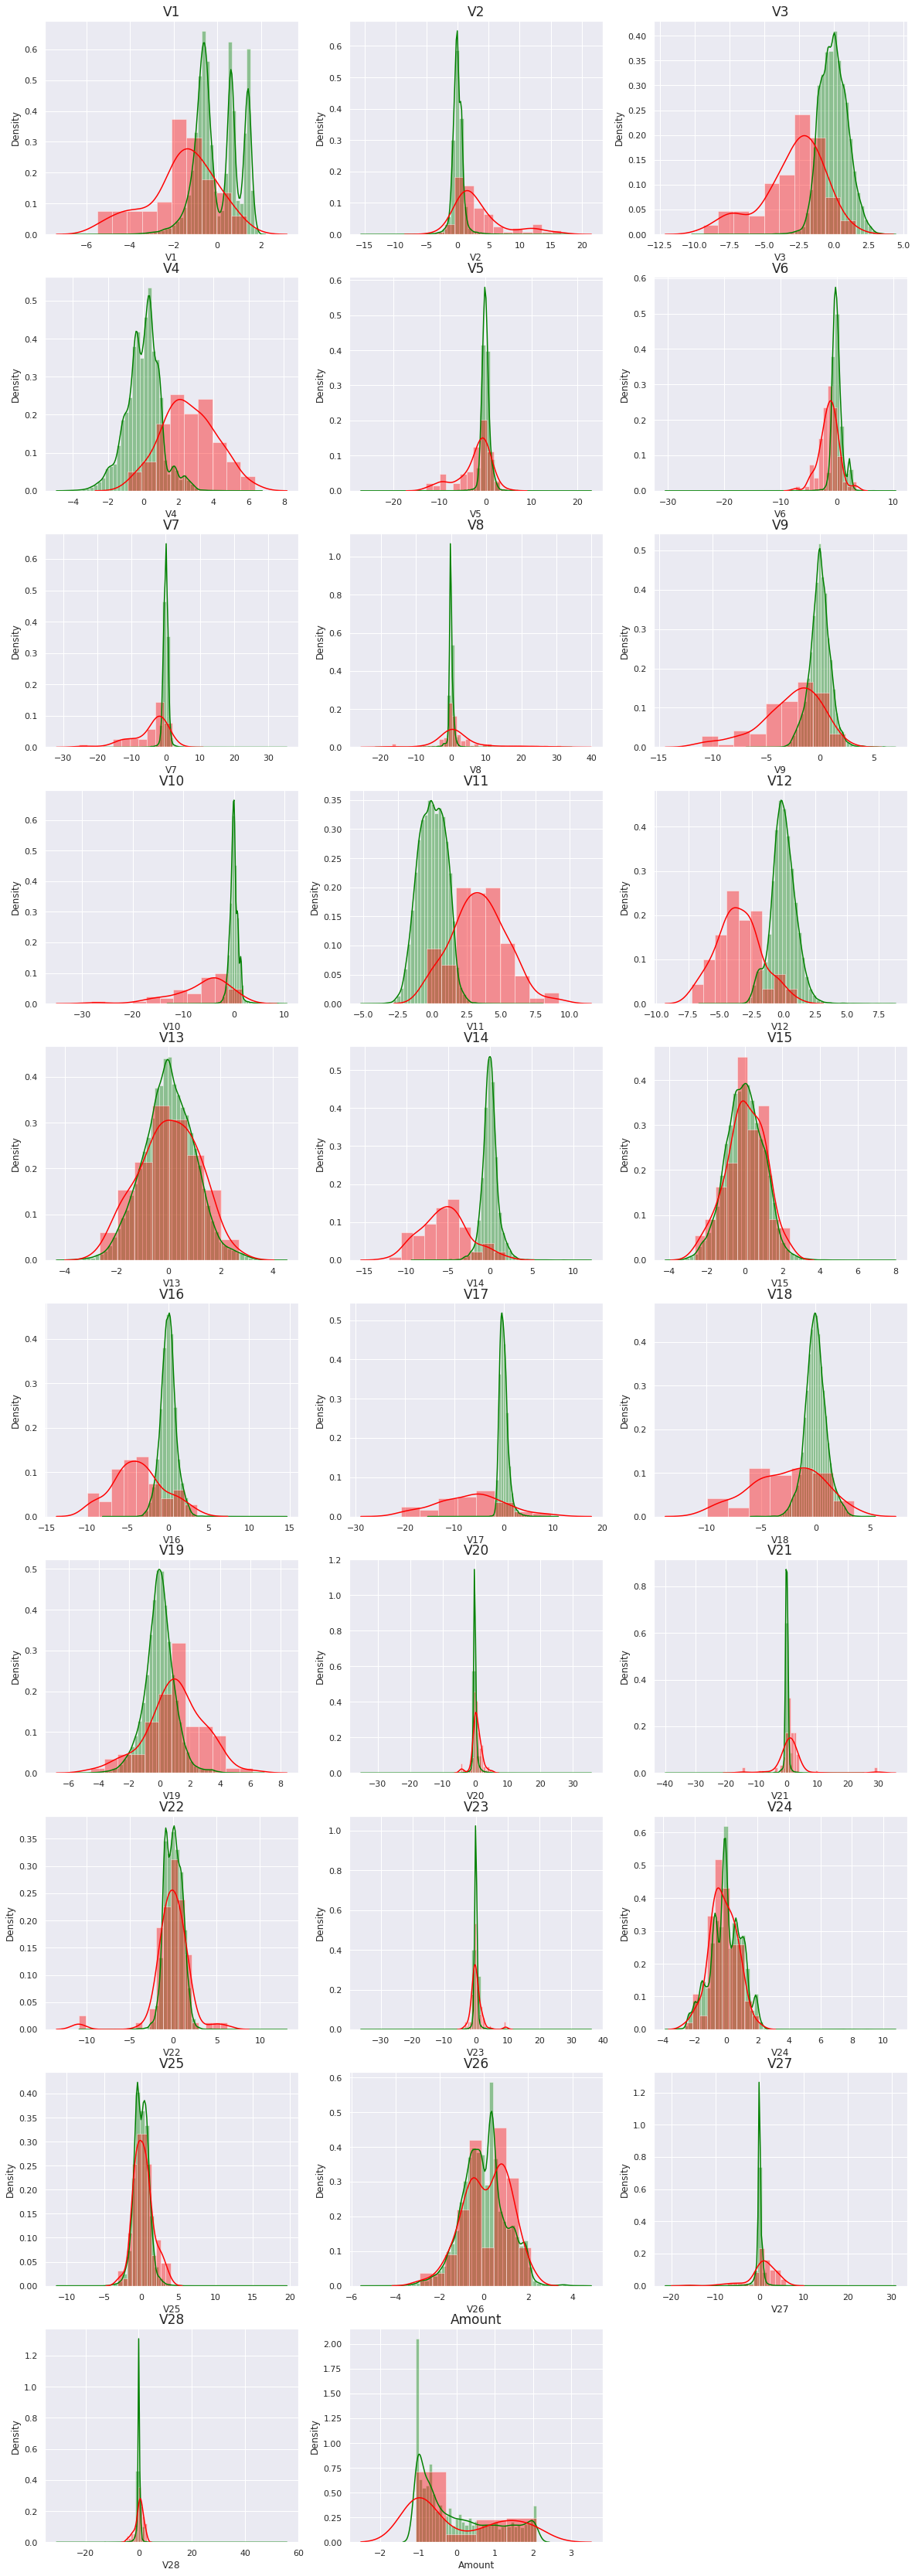

In [34]:
# plotting the histogram of a variable from the test dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_test[col][normal_records], color='green')
  sns.distplot(X_test[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [35]:
#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

### Performing cross validation 

In [36]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle = True, random_state=42)
# X is the feature set and y is the target in given data set
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     5      7      9 ... 284778 284793 284799]
TRAIN: [     0      3      4 ... 284804 284805 284806] TEST: [     1      2     13 ... 284792 284797 284801]
TRAIN: [     1      2      5 ... 284800 284801 284803] TEST: [     0      3      4 ... 284804 284805 284806]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    14     19     27 ... 284795 284796 284800]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    11     15     22 ... 284791 284794 284803]


### Logistic Regression Model on Unbalanced data set

In [37]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = {"C": [0.01, 0.1, 1, 10, 100, 1000]} #--> list of values
cv_num =  StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42) #--> list of values

In [38]:

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = num_C, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train_cv, y_train_cv)

print('Best ROC AUC score: ', model_cv.best_score_)

print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9749226249826751
Best hyperparameters:  {'C': 0.01}


In [39]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.114919,0.257634,0.034664,0.010536,0.01,{'C': 0.01},0.986003,0.980926,0.982760,0.961378,...,0.974923,0.010326,1,0.973791,0.979093,0.981591,0.968048,0.985493,0.977603,0.006103
1,5.402314,0.087897,0.025622,0.000597,0.1,{'C': 0.1},0.973797,0.982640,0.971280,0.940578,...,0.956811,0.024954,2,0.962040,0.955537,0.964908,0.953995,0.963734,0.960043,0.004431
2,5.310052,0.092749,0.026378,0.000484,1,{'C': 1},0.980872,0.965301,0.945160,0.951939,...,0.950632,0.023755,5,0.951073,0.945403,0.950065,0.967886,0.960643,0.955014,0.008121
3,5.430415,0.057731,0.026985,0.000762,10,{'C': 10},0.980789,0.973858,0.948818,0.949669,...,0.950836,0.027970,4,0.952340,0.953075,0.956173,0.957613,0.960093,0.955859,0.002872
4,5.553900,0.241284,0.027044,0.001652,100,{'C': 100},0.980216,0.972614,0.964808,0.951186,...,0.956483,0.023497,3,0.949874,0.947644,0.959763,0.957239,0.964343,0.955772,0.006203
5,4.807775,1.013115,0.022715,0.004912,1000,{'C': 1000},0.980722,0.978911,0.944141,0.951004,...,0.950362,0.030397,6,0.953120,0.949681,0.947035,0.956952,0.961622,0.953682,0.005182


In [40]:
model_cv.best_params_

{'C': 0.01}

#### Logistic Regression with Hyperparameter on Unbalanced data

In [41]:
C = model_cv.best_params_['C']
# Instantiating the LogisticRegression model with best C
log_reg_imb_model = LogisticRegression(C = C)

# Fitting the model on training dataset
log_reg_imb_model.fit(X_train_cv, y_train_cv)

LogisticRegression(C=0.01)

In [42]:
# Creating function to display Precision, Recall, f1 score and classification report
def display_model_scores(y_test, y_pred):
    '''
    Display Precision,Recall ,f1 score and classification report of a model.
    '''
    print(f"Model Precision score: {round(precision_score(y_test, y_pred),2)}.") 
    print(f"Model Recall score: {round(recall_score(y_test, y_pred),2)}") 
    print(f"Model F1 Score: {round(f1_score(y_test, y_pred),2)}") 
    print(f"Model Classification Report: \n {classification_report(y_test, y_pred)}")

In [43]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train_cv)

In [44]:
display_model_scores(y_train_cv, y_train_pred)

Model Precision score: 0.83.
Model Recall score: 0.61
Model F1 Score: 0.7
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227452
           1       0.83      0.61      0.70       394

    accuracy                           1.00    227846
   macro avg       0.92      0.80      0.85    227846
weighted avg       1.00      1.00      1.00    227846



In [45]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [46]:
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train_cv)[:,1]

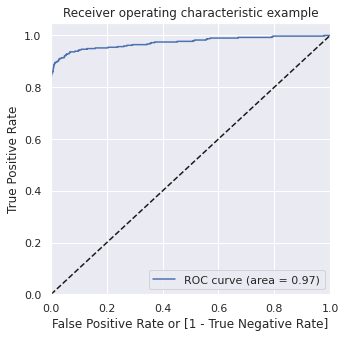

In [47]:
# Plotting the ROC curve
draw_roc(y_train_cv, y_train_pred_proba)

In [48]:
# Evaluating the model on test data set
y_test_pred = log_reg_imb_model.predict(X_test_cv)
display_model_scores(y_test_cv, y_test_pred)

Model Precision score: 0.83.
Model Recall score: 0.68
Model F1 Score: 0.75
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.83      0.68      0.75        98

    accuracy                           1.00     56961
   macro avg       0.91      0.84      0.87     56961
weighted avg       1.00      1.00      1.00     56961



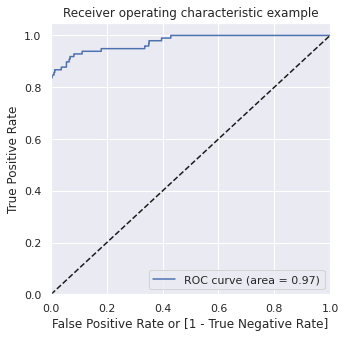

In [49]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test_cv)[:,1]
# Plotting the ROC curve for test data
draw_roc(y_test_cv, y_test_pred_proba)

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Decision Tree on  Unbalanced data

In [50]:
# Creating the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiating the Decision tree classifier
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = cv_num, 
                           n_jobs=-1,
                           verbose = 1)

# Fitting the grid search to the data
grid_search.fit(X_train_cv,y_train_cv)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [51]:
# cross validation results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.701541,0.048507,0.023994,0.003846,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.911172,0.925155,0.947757,0.928303,0.915048,0.925487,0.012790,8
1,6.834757,0.147424,0.022558,0.001315,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.923825,0.937969,0.947753,0.940929,0.915059,0.933107,0.011926,7
2,6.651494,0.116288,0.022157,0.001416,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.947178,0.938932,0.947841,0.940920,0.914914,0.937957,0.012029,2
3,6.689763,0.044401,0.022991,0.000501,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.947178,0.938932,0.947841,0.940920,0.914914,0.937957,0.012029,2
4,13.356332,0.163109,0.023511,0.001137,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.951998,0.930613,0.973805,0.929854,0.927836,0.942821,0.017810,1
5,13.115454,0.038174,0.023446,0.002068,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.926799,0.930628,0.973808,0.917349,0.927731,0.935263,0.019781,4
6,13.169730,0.119659,0.025025,0.000998,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.922578,0.930730,0.956062,0.936302,0.927358,0.934606,0.011623,6
7,13.008538,0.035019,0.022203,0.004611,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.922610,0.930741,0.956178,0.936332,0.927350,0.934642,0.011660,5


In [52]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.942821195888145
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [53]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}

#### Decision Treemodel  optimal hyperparameters obtained from above on Unbalanced data


In [54]:
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=grid_search.best_params_['max_depth'], 
                                  min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                  min_samples_split=grid_search.best_params_['min_samples_split'])

dt_imb_model.fit(X_train_cv, y_train_cv)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

In [55]:
# Prediction on train data set
y_train_pred = dt_imb_model.predict(X_train_cv)
display_model_scores(y_train_cv, y_train_pred)

Model Precision score: 0.94.
Model Recall score: 0.61
Model F1 Score: 0.74
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227452
           1       0.94      0.61      0.74       394

    accuracy                           1.00    227846
   macro avg       0.97      0.81      0.87    227846
weighted avg       1.00      1.00      1.00    227846



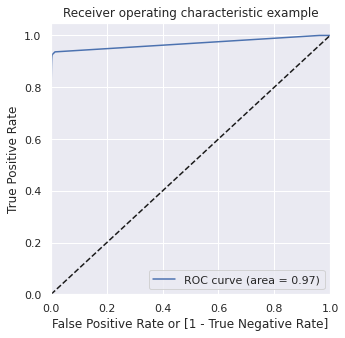

In [56]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train_cv)[:,1]

# Plotting the ROC curve
draw_roc(y_train_cv, y_train_pred_proba)

In [57]:
#Evaluating on test data set
y_test_pred = dt_imb_model.predict(X_test_cv)
display_model_scores(y_test_cv, y_test_pred)

Model Precision score: 0.88.
Model Recall score: 0.53
Model F1 Score: 0.66
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.88      0.53      0.66        98

    accuracy                           1.00     56961
   macro avg       0.94      0.77      0.83     56961
weighted avg       1.00      1.00      1.00     56961



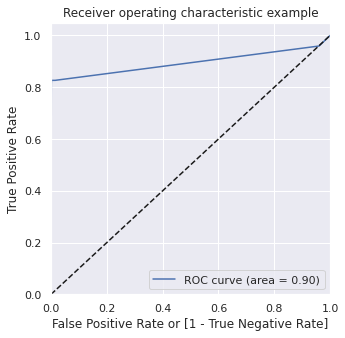

In [58]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test_cv)[:,1]

# Plotting the ROC curve
draw_roc(y_test_cv, y_test_pred_proba)

### Random Forest on Unbalanced data

In [59]:
cv_num_rf =  StratifiedKFold(n_splits = 2, shuffle = True, random_state = 42) #--> list of values
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators':[100, 200], 
    'max_features': [10, 20]
}
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = param_grid, 
                           cv = cv_num_rf,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score = True)

grid_search.fit(X_train_cv, y_train_cv)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200]},
             return_train_score=True, verbose=1)

In [60]:
# cross validation results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,93.238031,0.441334,0.827864,0.009908,5,10,50,50,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.999149,0.999228,0.999188,0.000040,4,0.999149,0.999324,0.999236,0.000088
1,185.383999,2.047463,1.608002,0.027719,5,10,50,50,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.999219,0.999201,0.999210,0.000009,2,0.999175,0.999333,0.999254,0.000079
2,92.983406,0.068912,0.804504,0.023191,5,10,50,100,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.999192,0.999210,0.999201,0.000009,3,0.999140,0.999315,0.999228,0.000088
3,185.366616,0.430717,1.704421,0.068899,5,10,50,100,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.999219,0.999210,0.999214,0.000004,1,0.999166,0.999315,0.999241,0.000075
4,92.665370,0.088229,0.825278,0.011297,5,10,100,50,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.999026,0.999122,0.999074,0.000048,13,0.999061,0.999219,0.999140,0.000079
5,185.910141,1.321370,1.813985,0.132262,5,10,100,50,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.999034,0.999105,0.999070,0.000035,14,0.999026,0.999149,0.999087,0.000061
6,92.623343,0.312889,0.812716,0.035338,5,10,100,100,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.999052,0.999061,0.999056,0.000004,16,0.999026,0.999113,0.999070,0.000044
7,186.564014,0.337180,1.643524,0.021633,5,10,100,100,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.999061,0.999078,0.999070,0.000009,14,0.999096,0.999131,0.999113,0.000018
8,183.661256,0.726602,0.823305,0.016695,5,20,50,50,100,"{'max_depth': 5, 'max_features': 20, 'min_samp...",0.999166,0.999070,0.999118,0.000048,8,0.999122,0.999201,0.999162,0.000040
9,364.182068,1.263566,1.500567,0.009911,5,20,50,50,200,"{'max_depth': 5, 'max_features': 20, 'min_samp...",0.999184,0.999078,0.999131,0.000053,7,0.999122,0.999210,0.999166,0.000044


In [61]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9992143816437418
RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=200)


In [62]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 200}

####  Random forest model with the optimal hyperparameters obtained from above on unbalanced data

In [63]:

rf_imb_model = RandomForestClassifier(bootstrap = True,
                             max_depth = grid_search.best_params_['max_depth'],
                             min_samples_leaf = grid_search.best_params_['min_samples_leaf'], 
                             min_samples_split = grid_search.best_params_['min_samples_split'],
                             max_features = grid_search.best_params_['max_features'],
                             n_estimators = grid_search.best_params_['n_estimators'])
rf_imb_model.fit(X_train_cv, y_train_cv)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=200)

In [64]:
#Model evaluation on train data set
y_train_pred = rf_imb_model.predict(X_train_cv)

display_model_scores(y_train_cv, y_train_pred)

Model Precision score: 0.86.
Model Recall score: 0.74
Model F1 Score: 0.8
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227452
           1       0.86      0.74      0.80       394

    accuracy                           1.00    227846
   macro avg       0.93      0.87      0.90    227846
weighted avg       1.00      1.00      1.00    227846



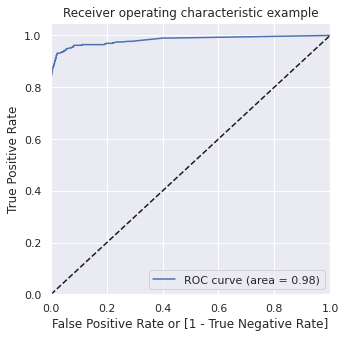

In [65]:
# Predicted probability
y_train_pred_proba_imb_rf = rf_imb_model.predict_proba(X_train_cv)[:,1]

# Plotting the ROC curve
draw_roc(y_train_cv, y_train_pred_proba_imb_rf)

In [66]:
#Model evaluation on test data set
y_test_pred = rf_imb_model.predict(X_test_cv)
display_model_scores(y_test_cv, y_test_pred)

Model Precision score: 0.86.
Model Recall score: 0.69
Model F1 Score: 0.77
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.69      0.77        98

    accuracy                           1.00     56961
   macro avg       0.93      0.85      0.88     56961
weighted avg       1.00      1.00      1.00     56961



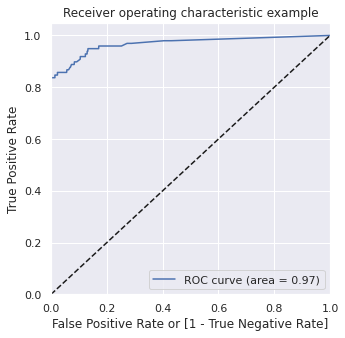

In [67]:
# Predicted probability
y_test_pred_proba_imb_rf = rf_imb_model.predict_proba(X_test_cv)[:,1]

draw_roc(y_test_cv, y_test_pred_proba_imb_rf)

### XGBOOST on Unbalanced data

In [68]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9],
             'verbosity': [0]}          

#Instantiating the XGBOOST model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# setting up GridSearchCV
model_cv = GridSearchCV(estimator = xgb_model,  
                        param_grid = param_grid, 
                        scoring = 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score = True
                       )      

model_cv.fit(X_train_cv, y_train_cv)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=n...one_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
      

In [69]:
# cross validation results 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,param_verbosity,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,20.999548,0.335593,0.049747,0.000492,0.2,0.3,0,"{'learning_rate': 0.2, 'subsample': 0.3, 'verb...",0.983636,0.982905,...,0.982360,0.005205,3,0.999684,0.999711,0.999369,0.999374,0.999662,0.999560,0.000155
1,31.813351,0.097943,0.049738,0.000272,0.2,0.6,0,"{'learning_rate': 0.2, 'subsample': 0.6, 'verb...",0.983803,0.978518,...,0.982560,0.006095,2,0.999919,0.999839,0.999883,0.999943,0.999889,0.999895,0.000035
2,39.135505,0.127141,0.051626,0.003335,0.2,0.9,0,"{'learning_rate': 0.2, 'subsample': 0.9, 'verb...",0.986420,0.980600,...,0.982739,0.004210,1,0.999789,0.999864,0.999807,0.999846,0.999802,0.999821,0.000028
3,20.350254,0.338668,0.049706,0.000626,0.6,0.3,0,"{'learning_rate': 0.6, 'subsample': 0.3, 'verb...",0.965031,0.979967,...,0.970290,0.006455,6,0.999985,0.999992,0.999952,0.999887,0.999984,0.999960,0.000039
4,30.595661,0.123570,0.049789,0.000563,0.6,0.6,0,"{'learning_rate': 0.6, 'subsample': 0.6, 'verb...",0.979404,0.982211,...,0.978224,0.004607,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,38.146374,0.196046,0.054505,0.007663,0.6,0.9,0,"{'learning_rate': 0.6, 'subsample': 0.9, 'verb...",0.992912,0.984435,...,0.980973,0.008660,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [70]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9827385114416579
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=0)


In [71]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9, 'verbosity': 0}

### XGBOOST model with optimal hyperparameters obtained from above 

In [72]:
params = {'learning_rate': model_cv.best_params_['learning_rate'],
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':model_cv.best_params_['subsample'],
          'objective':'binary:logistic'}

xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train_cv, y_train_cv)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [73]:
#Model evaluation on train data set
y_train_pred = xgb_imb_model.predict(X_train_cv)

display_model_scores(y_train_cv, y_train_pred)

Model Precision score: 1.0.
Model Recall score: 1.0
Model F1 Score: 1.0
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227452
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227846
   macro avg       1.00      1.00      1.00    227846
weighted avg       1.00      1.00      1.00    227846



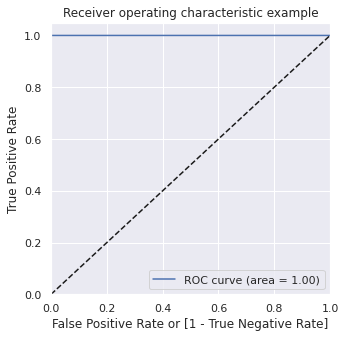

In [74]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train_cv)[:,1]

# Plotting the ROC curve
draw_roc(y_train_cv, y_train_pred_proba_imb_xgb)

In [75]:
#Model evaluation on test data set
y_test_pred = xgb_imb_model.predict(X_test_cv)
display_model_scores(y_test_cv, y_test_pred)

Model Precision score: 0.91.
Model Recall score: 0.81
Model F1 Score: 0.85
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.81      0.85        98

    accuracy                           1.00     56961
   macro avg       0.95      0.90      0.93     56961
weighted avg       1.00      1.00      1.00     56961



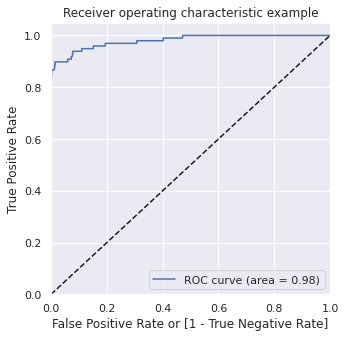

In [76]:
y_test_pred_proba = xgb_imb_model.predict_proba(X_test_cv)[:,1]

draw_roc(y_test_cv, y_test_pred_proba)

##### XGBOOST with AUC 1 on train data and 0.98 on test data with Recall 1 on train  and 0.71 on test is choosen good model for Unbalanced data

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


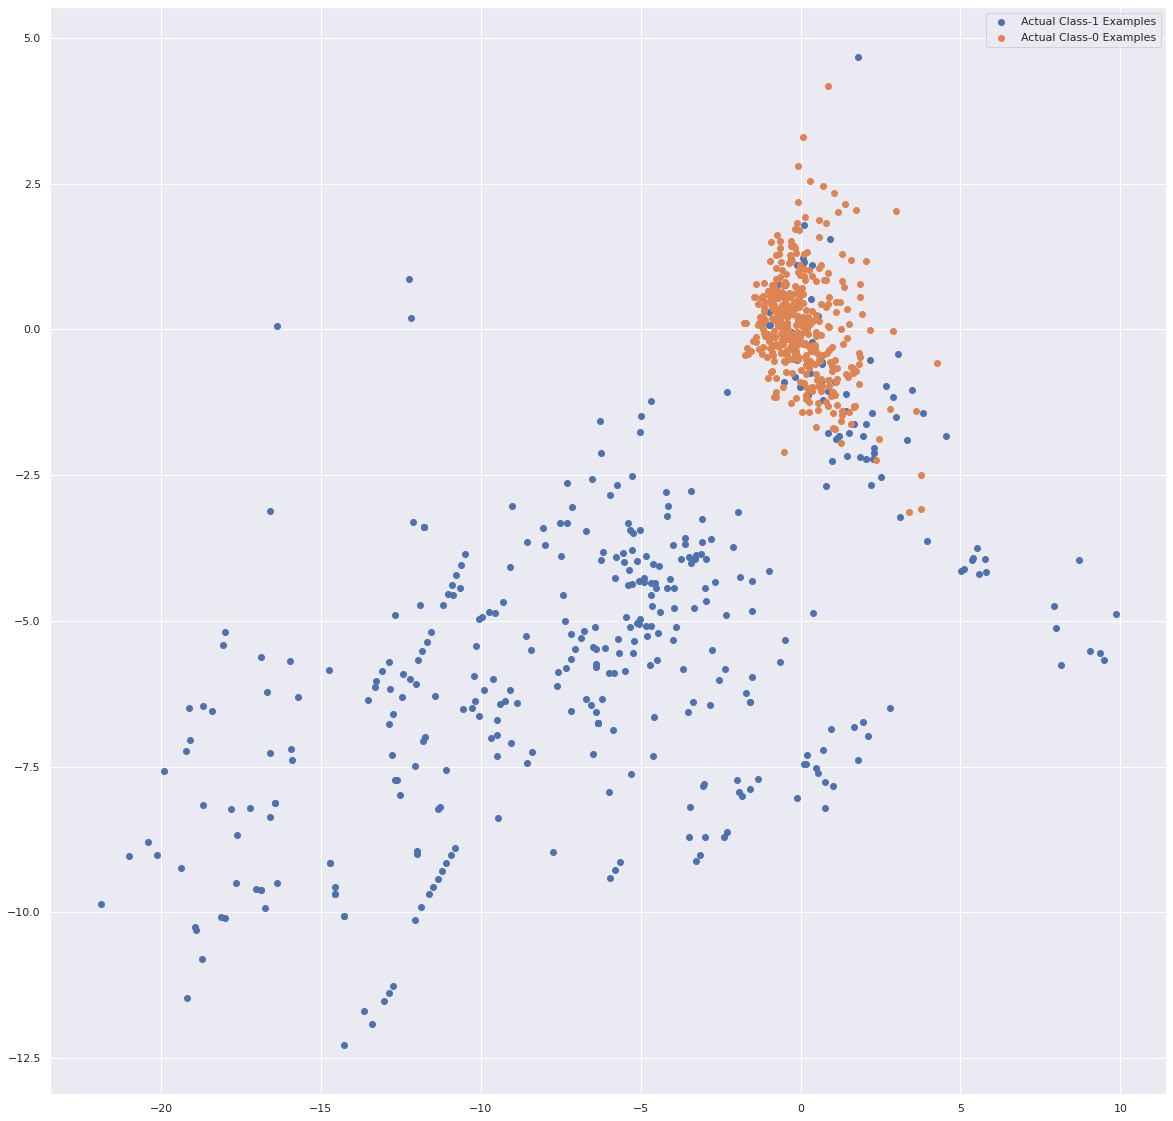

In [77]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [78]:
print('Train auc =', metrics.roc_auc_score(y_train_cv, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train_cv, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.8597198


#### We got  AUC of 1 and Recall 1 using XGBOOST on unbalanced data

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### 1. Random Oversampling

In [79]:
from imblearn.over_sampling import RandomOverSampler #- import the packages
from collections import Counter
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train_cv, y_train_cv)
print('Before sampling class of distribution:-',Counter(y_train_cv))
print('New class of distribution:-',Counter(y_over))

Before sampling class of distribution:- Counter({0: 227452, 1: 394})
New class of distribution:- Counter({0: 227452, 1: 227452})


### Logistic Regression with Random OverSampling data

In [80]:
# Creating KFold object with 5 splits
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fitting the model
model_cv.fit(X_over, y_over)
print('Best ROC AUC score: ', model_cv.best_score_)
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9869909893167105
Best hyperparameters:  {'C': 10}


In [81]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.852503,0.140604,0.050168,0.003059,0.01,{'C': 0.01},0.986234,0.986297,0.986763,0.986039,...,0.986314,0.000241,6,0.986298,0.986027,0.986868,0.986379,0.986182,0.986351,0.000284
1,8.889648,0.458635,0.047951,0.000553,0.1,{'C': 0.1},0.986311,0.986901,0.986528,0.986206,...,0.986503,0.000240,5,0.986380,0.986628,0.986672,0.986472,0.986476,0.986526,0.000108
2,8.453266,0.287892,0.048604,0.001007,1,{'C': 1},0.986634,0.986758,0.986367,0.986441,...,0.986585,0.000155,4,0.986644,0.986495,0.986495,0.986721,0.986639,0.986599,0.000090
3,9.004113,0.150274,0.048859,0.000870,10,{'C': 10},0.986812,0.986862,0.986731,0.987063,...,0.986991,0.000271,1,0.986794,0.986586,0.986843,0.987307,0.987478,0.987002,0.000335
4,8.900905,0.285977,0.048355,0.000712,100,{'C': 100},0.986344,0.987083,0.986305,0.987377,...,0.986786,0.000416,3,0.986401,0.986836,0.986452,0.987667,0.986806,0.986832,0.000453
5,8.530667,0.064182,0.047116,0.001389,1000,{'C': 1000},0.986785,0.986940,0.986646,0.987390,...,0.986937,0.000250,2,0.986731,0.986680,0.986776,0.987665,0.986915,0.986953,0.000364


In [82]:
model_cv.best_params_

{'C': 10}

#### Logistic Regression with Hyperparameters obtained on Random oversamapling data

In [83]:
C = model_cv.best_params_['C']
# Instantiating the Logistic regression model
logreg_over = LogisticRegression(C=C)

# Fitting the model with train data
logreg_over_model = logreg_over.fit(X_over, y_over)

In [84]:
# Evaluating the model on train data
y_train_pred = logreg_over_model.predict(X_over)
# Printing scores
display_model_scores(y_over, y_train_pred)

Model Precision score: 0.98.
Model Recall score: 0.92
Model F1 Score: 0.95
Model Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95    227452
           1       0.98      0.92      0.95    227452

    accuracy                           0.95    454904
   macro avg       0.95      0.95      0.95    454904
weighted avg       0.95      0.95      0.95    454904



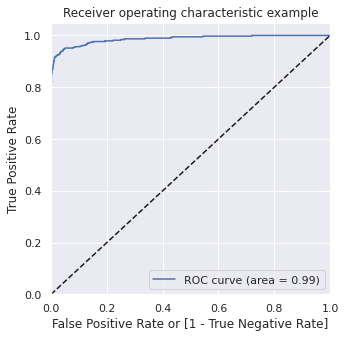

In [85]:
# Predicted probability
y_train_pred_proba = logreg_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

In [86]:
# Evaluating on test data
y_test_pred = logreg_over_model.predict(X_test_cv)

# Printing the scores
display_model_scores(y_test_cv, y_test_pred)

Model Precision score: 0.06.
Model Recall score: 0.88
Model F1 Score: 0.11
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.06      0.88      0.11        98

    accuracy                           0.97     56961
   macro avg       0.53      0.93      0.55     56961
weighted avg       1.00      0.97      0.99     56961



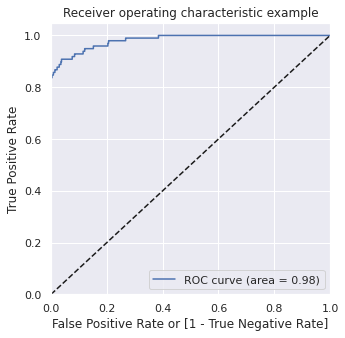

In [87]:
# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test_cv)[:,1]

# Plot the ROC curve
draw_roc(y_test_cv, y_test_pred_proba)

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

###  Decision Tree on Random OverSampling data

In [88]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

grid_search.fit(X_over,y_over)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [89]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9994458193134305
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [90]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}

#### Decision Tree with optimal hyperparameters

In [91]:
# Modelling with optimal hyperparameters obtained from above
dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=grid_search.best_params_['max_depth'], 
                                  min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                  min_samples_split=grid_search.best_params_['min_samples_split'])

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=42)

In [92]:
# Model evaluation on the train set
y_train_pred = dt_over_model.predict(X_over)
display_model_scores(y_over, y_train_pred)

Model Precision score: 0.99.
Model Recall score: 1.0
Model F1 Score: 1.0
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    227452
           1       0.99      1.00      1.00    227452

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



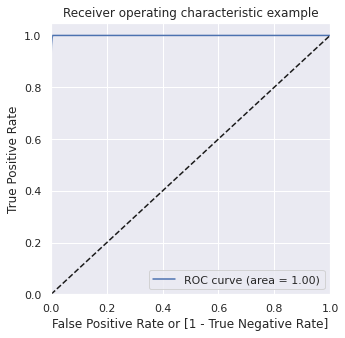

In [93]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

In [94]:
# Evaluating model on the test dataset
y_test_pred = dt_over_model.predict(X_test_cv)
display_model_scores(y_test_cv, y_test_pred)

Model Precision score: 0.2.
Model Recall score: 0.84
Model F1 Score: 0.32
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.84      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.92      0.66     56961
weighted avg       1.00      0.99      1.00     56961



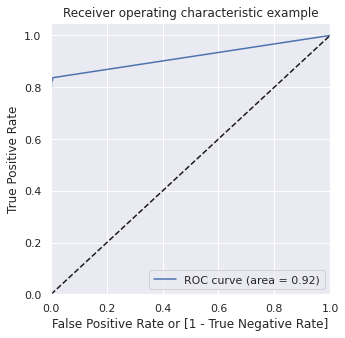

In [95]:
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_test_cv)[:,1]
# Plot the ROC curve
draw_roc(y_test_cv, y_test_pred_proba)

### Random Forest  on balanced  Random OverSampling data

In [96]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators':[100, 200], 
    'max_features': [10, 20]
}
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score = True)

grid_search.fit(X_over, y_over)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200]},
             return_train_score=True, verbose=1)

In [97]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,123.306245,0.176456,1.952780,0.019469,5,10,50,50,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.962291,0.961908,0.962100,0.000191,4,0.964669,0.975010,0.969840,0.005170
1,244.412287,0.665282,3.968018,0.086538,5,10,50,50,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.962401,0.962986,0.962693,0.000292,2,0.964656,0.976281,0.970468,0.005812
2,122.885320,0.880535,1.790068,0.011398,5,10,50,100,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.963777,0.963803,0.963790,0.000013,1,0.965791,0.976250,0.971020,0.005230
3,246.686351,1.667884,3.561859,0.081879,5,10,50,100,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.963157,0.961697,0.962427,0.000730,3,0.965777,0.975349,0.970563,0.004786
4,122.961387,0.165202,1.913116,0.008523,5,10,100,50,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.963562,0.959609,0.961585,0.001976,7,0.965909,0.974825,0.970367,0.004458
5,245.756422,1.147423,3.647768,0.052399,5,10,100,50,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.960774,0.962383,0.961579,0.000805,8,0.963452,0.976399,0.969926,0.006474
6,122.668119,0.671862,1.835096,0.008849,5,10,100,100,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.962550,0.960884,0.961717,0.000833,6,0.964494,0.975190,0.969842,0.005348
7,247.457070,0.475514,3.651849,0.025591,5,10,100,100,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.962256,0.961693,0.961974,0.000281,5,0.964665,0.975973,0.970319,0.005654
8,241.323476,0.844877,1.949723,0.058920,5,20,50,50,100,"{'max_depth': 5, 'max_features': 20, 'min_samp...",0.963649,0.950385,0.957017,0.006632,13,0.970961,0.972456,0.971708,0.000747
9,476.891940,1.054010,3.854062,0.119840,5,20,50,50,200,"{'max_depth': 5, 'max_features': 20, 'min_samp...",0.963271,0.950288,0.956780,0.006491,14,0.969809,0.972385,0.971097,0.001288


In [98]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9637901623199621
RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=100)


In [99]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 100}

#### Random Forest model with hyperparameters on Random Oversampling data

In [100]:
# Model with the best hyperparameters
rf_b_model = RandomForestClassifier(bootstrap = True,
                             max_depth = grid_search.best_params_['max_depth'],
                             min_samples_leaf = grid_search.best_params_['min_samples_leaf'], 
                             min_samples_split = grid_search.best_params_['min_samples_split'],
                             max_features = grid_search.best_params_['max_features'],
                             n_estimators = grid_search.best_params_['n_estimators'])
rf_b_model.fit(X_over, y_over)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=100)

In [101]:
# Model evaluation on train data set
y_train_pred = rf_b_model.predict(X_over)
display_model_scores(y_over, y_train_pred)

Model Precision score: 1.0.
Model Recall score: 0.94
Model F1 Score: 0.97
Model Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97    227452
           1       1.00      0.94      0.97    227452

    accuracy                           0.97    454904
   macro avg       0.97      0.97      0.97    454904
weighted avg       0.97      0.97      0.97    454904



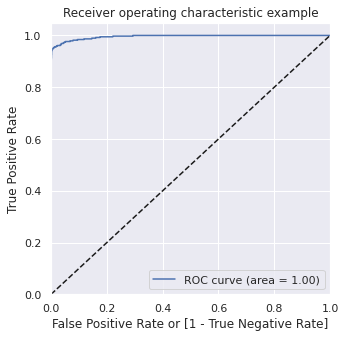

In [102]:
# Predicted probability
y_train_pred_proba_b_rf = rf_b_model.predict_proba(X_over)[:,1]

# Plotting the ROC curve
draw_roc(y_over, y_train_pred_proba_b_rf)

In [103]:
#Model evaluation on test data set
y_test_pred = rf_b_model.predict(X_test_cv)
display_model_scores(y_test_cv, y_test_pred)

Model Precision score: 0.32.
Model Recall score: 0.85
Model F1 Score: 0.46
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.32      0.85      0.46        98

    accuracy                           1.00     56961
   macro avg       0.66      0.92      0.73     56961
weighted avg       1.00      1.00      1.00     56961



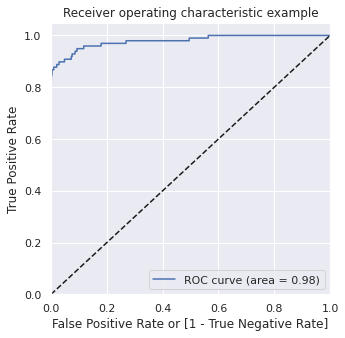

In [104]:
# Predicted probability
y_test_pred_proba_b_rf = rf_b_model.predict_proba(X_test_cv)[:,1]

draw_roc(y_test_cv, y_test_pred_proba_b_rf)

###  XGBOOST on  Random OverSampled data

In [105]:
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# setting up GridSearchCV
model_cv = GridSearchCV(estimator = xgb_model,  
                        param_grid = param_grid, 
                        scoring = 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score = True)      

model_cv.fit(X_over, y_over)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,


In [106]:
# cross validation results 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,37.046788,0.149121,0.109772,0.029980,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999895,0.999924,0.999876,...,0.999905,0.000017,4,0.999908,0.999914,0.999917,0.999914,0.999922,0.999915,4.643750e-06
1,48.210873,1.103438,0.094406,0.001925,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999893,0.999926,0.999881,...,0.999902,0.000015,5,0.999906,0.999915,0.999923,0.999914,0.999916,0.999915,5.285339e-06
2,53.810653,0.390425,0.093558,0.001438,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999900,0.999923,0.999870,...,0.999901,0.000018,6,0.999910,0.999904,0.999917,0.999909,0.999918,0.999912,4.967139e-06
3,35.277675,0.201335,0.093914,0.001222,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999965,0.999993,0.999993,...,0.999988,0.000012,2,1.000000,0.999997,0.999997,0.999998,0.999996,0.999998,1.144053e-06
4,47.288464,0.175386,0.108308,0.030140,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999977,0.999985,0.999978,...,0.999986,0.000008,3,0.999998,0.999999,0.999999,1.000000,1.000000,0.999999,6.317037e-07
5,53.495112,0.140683,0.095811,0.006193,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999979,1.000000,0.999993,...,0.999991,0.000008,1,1.000000,1.000000,0.999998,0.999999,0.999999,0.999999,5.717167e-07


In [107]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999911567259525
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [108]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

#### XGBOOST model with optimal hyperparameters obtained from above 


In [109]:
params = {'learning_rate': model_cv.best_params_['learning_rate'],
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':model_cv.best_params_['subsample'],
          'objective':'binary:logistic'}

xgb_b_model = XGBClassifier(params = params)
xgb_b_model.fit(X_over, y_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [110]:
#Model evaluation on train data set
y_train_pred = xgb_b_model.predict(X_over)

display_model_scores(y_over, y_train_pred)

Model Precision score: 1.0.
Model Recall score: 1.0
Model F1 Score: 1.0
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227452
           1       1.00      1.00      1.00    227452

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



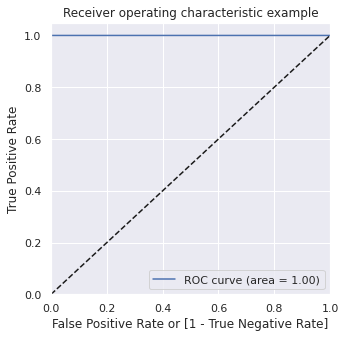

In [111]:
# Predicted probability
y_train_pred_proba_b_xgb = xgb_b_model.predict_proba(X_over)[:,1]

# Plotting the ROC curve
draw_roc(y_over, y_train_pred_proba_b_xgb)

In [112]:
#Model evaluation on test data set
y_test_pred = xgb_b_model.predict(X_test_cv)
display_model_scores(y_test_cv, y_test_pred)

Model Precision score: 0.9.
Model Recall score: 0.8
Model F1 Score: 0.84
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.90      0.80      0.84        98

    accuracy                           1.00     56961
   macro avg       0.95      0.90      0.92     56961
weighted avg       1.00      1.00      1.00     56961



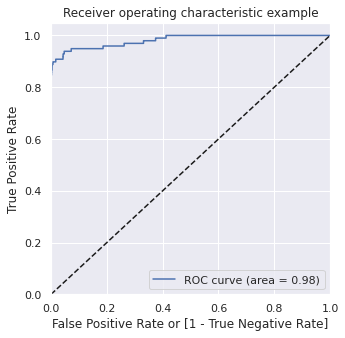

In [113]:
y_test_pred_proba = xgb_b_model.predict_proba(X_test_cv)[:,1]

draw_roc(y_test_cv, y_test_pred_proba)

#### Selecting XGBOOST as best model on Random Oversampled data as we got AUC_ROC and recall as 1 in train data

Top var = 14
2nd Top var = 4
3rd Top var = 8


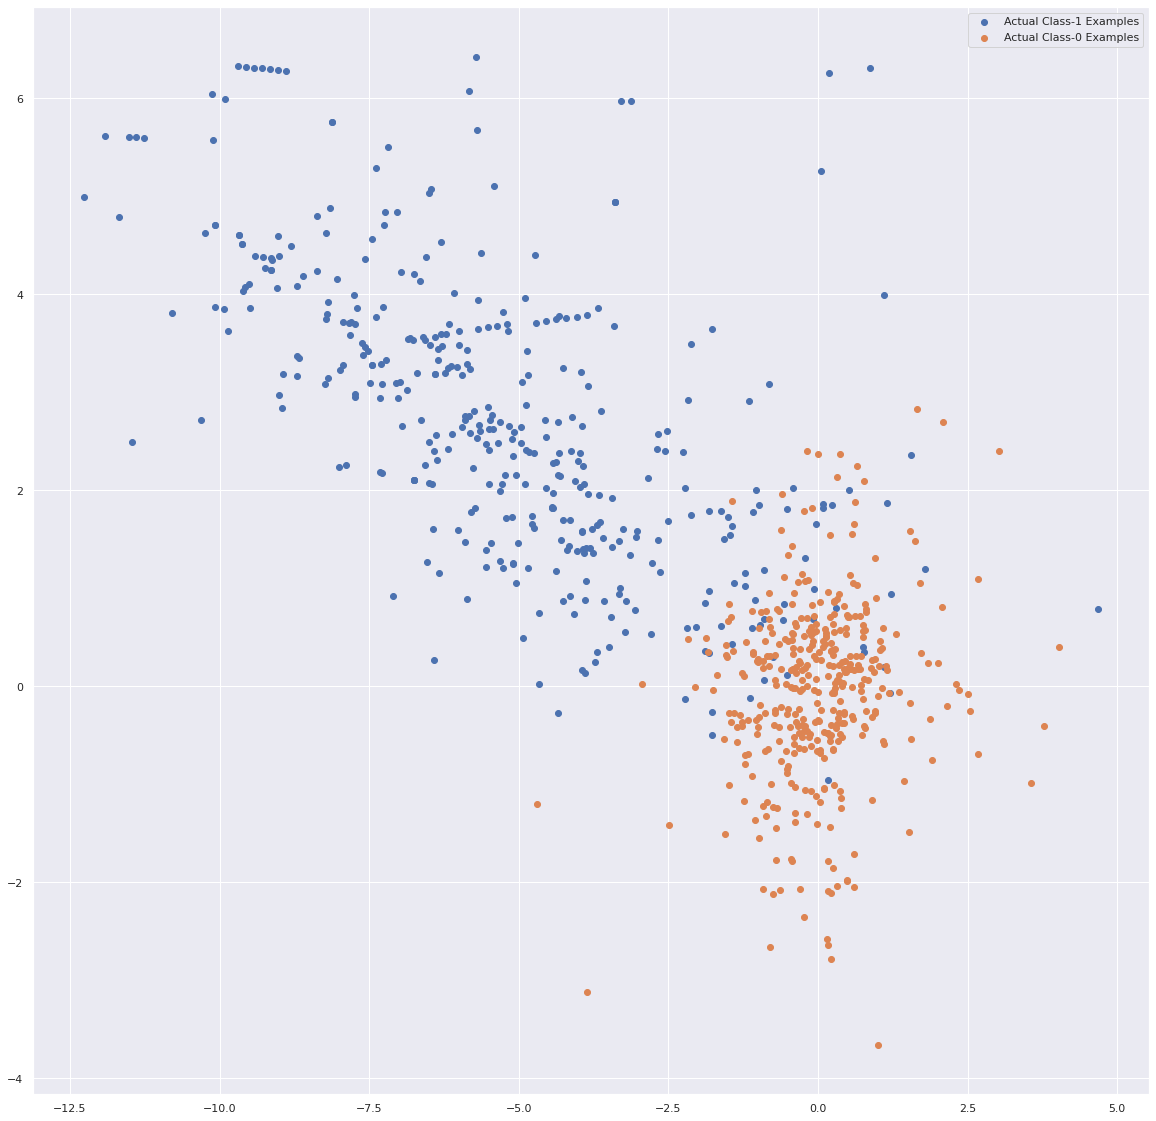

In [114]:
var_imp = []
for i in xgb_b_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_b_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_b_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_b_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_b_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_b_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [115]:
#### Print the FPR,TPR & select the best threshold from the roc curve
print('Train auc =', metrics.roc_auc_score(y_over, y_train_pred_proba_b_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_over, y_train_pred_proba_b_xgb )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 1.0
0.99964666


### Print the class distribution after applying SMOTE 

In [116]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

skf = StratifiedKFold(n_splits=5,shuffle = True ,random_state=42)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    sm = SMOTE(random_state=42)
    X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
  
#Creating Dataframe for X_train_smote
X_train_Smote = pd.DataFrame(data=X_train_smote,   columns=cols)

In [117]:
print('Before sampling class of distribution:-',Counter(y_train_cv))
print('New class of distribution:-',Counter(y_train_smote))

Before sampling class of distribution:- Counter({0: 227452, 1: 394})
New class of distribution:- Counter({0: 227452, 1: 227452})


### Logistic Regression on balanced data with SMOTE

In [118]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train_smote, y_train_smote)
print('Best ROC AUC score: ', model_cv.best_score_)
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9921852189211714
Best hyperparameters:  {'C': 1000}


In [119]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.842898,0.364493,0.051688,0.001082,0.01,{'C': 0.01},0.991829,0.991860,0.991550,0.992252,...,0.991789,0.000280,6,0.991858,0.991207,0.991734,0.992270,0.991832,0.991780,0.000340
1,8.676937,0.200055,0.053542,0.002637,0.1,{'C': 0.1},0.991945,0.992712,0.991382,0.992219,...,0.992068,0.000430,3,0.991960,0.992136,0.991583,0.992258,0.992461,0.992080,0.000297
2,8.851054,0.444981,0.053186,0.003644,1,{'C': 1},0.992352,0.992191,0.991923,0.992417,...,0.992181,0.000188,2,0.992347,0.991561,0.992124,0.992460,0.992426,0.992184,0.000333
3,8.810203,0.412817,0.051735,0.001195,10,{'C': 10},0.992201,0.991901,0.991641,0.992310,...,0.992037,0.000239,5,0.992204,0.991241,0.991827,0.992344,0.992486,0.992020,0.000447
4,8.624269,0.278370,0.051523,0.001856,100,{'C': 100},0.992105,0.992084,0.991735,0.992297,...,0.992045,0.000182,4,0.992127,0.991438,0.991929,0.992353,0.992407,0.992051,0.000351
5,8.741604,0.101338,0.053779,0.003517,1000,{'C': 1000},0.992349,0.992115,0.992029,0.992342,...,0.992185,0.000134,1,0.992353,0.991466,0.992209,0.992396,0.992482,0.992181,0.000368


In [120]:
print(model_cv.best_params_)

{'C': 1000}


In [121]:
C = model_cv.best_params_['C']
# Instantiating the model
logreg_smote_model = LogisticRegression(C=C)

# Fitting the model with SMOTE balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=1000)

In [122]:
# Evaluating on train data set
y_train_pred = logreg_smote_model.predict(X_train_smote)
display_model_scores(y_train_smote, y_train_pred)

Model Precision score: 0.98.
Model Recall score: 0.94
Model F1 Score: 0.96
Model Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96    227452
           1       0.98      0.94      0.96    227452

    accuracy                           0.96    454904
   macro avg       0.96      0.96      0.96    454904
weighted avg       0.96      0.96      0.96    454904



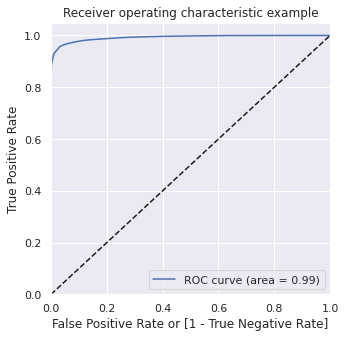

In [123]:
# Predicted probability
y_train_pred_proba_smote = logreg_smote_model.predict_proba(X_train_smote)[:,1]
# Plotting the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_smote)

In [124]:
# Evaluating on test data set
y_test_pred = logreg_smote_model.predict(X_test_cv)
display_model_scores(y_test_cv, y_test_pred)

Model Precision score: 0.06.
Model Recall score: 0.87
Model F1 Score: 0.12
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.06      0.87      0.12        98

    accuracy                           0.98     56961
   macro avg       0.53      0.92      0.55     56961
weighted avg       1.00      0.98      0.99     56961



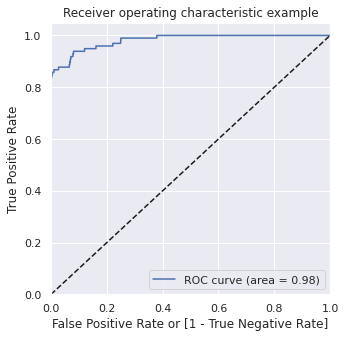

In [125]:
# Predicted probability
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test_cv)[:,1]
# Plotting the ROC curve
draw_roc(y_test_cv, y_test_pred_proba_smote)

### Decision Tree on balanced data with SMOTE

In [126]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fitting the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [127]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9981685649138177
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [128]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}

#### Decision Tree model with hyperparameters on SMOTE data set

In [129]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=grid_search.best_params_['max_depth'], 
                                  min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                  min_samples_split=grid_search.best_params_['min_samples_split'])

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=42)

In [130]:
# EValuating on train SMOTE data set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
display_model_scores(y_train_smote, y_train_pred_smote)

Model Precision score: 0.99.
Model Recall score: 0.99
Model F1 Score: 0.99
Model Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227452
           1       0.99      0.99      0.99    227452

    accuracy                           0.99    454904
   macro avg       0.99      0.99      0.99    454904
weighted avg       0.99      0.99      0.99    454904



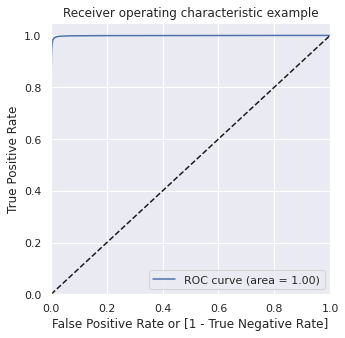

In [131]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plotting the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [132]:
# Evaluating the model on  test data
y_pred = dt_smote_model.predict(X_test_cv)
display_model_scores(y_test_cv, y_pred)

Model Precision score: 0.11.
Model Recall score: 0.86
Model F1 Score: 0.2
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.11      0.86      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.60     56961
weighted avg       1.00      0.99      0.99     56961



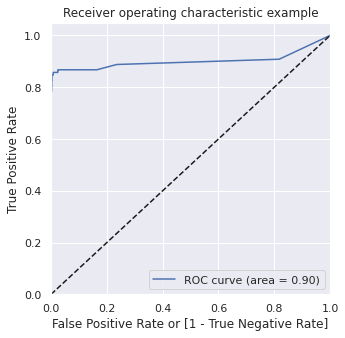

In [133]:
y_test_pred_smote = dt_smote_model.predict_proba(X_test_cv)[:,1]
# Plotting the ROC curve
draw_roc(y_test_cv, y_test_pred_smote)

### Random Forest with SMOTE balanced dataset

In [134]:
folds = StratifiedKFold(n_splits = 2, shuffle = True, random_state = 42)
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators':[100, 200], 
    'max_features': [10, 20]
}
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = param_grid, 
                           cv = folds,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score = True)

grid_search.fit(X_train_smote, y_train_smote)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200]},
             return_train_score=True, verbose=1)

In [135]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,190.447390,0.867544,1.874581,0.001498,5,10,50,50,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.963311,0.961706,0.962509,0.000802,11,0.963320,0.961908,0.962614,0.000706
1,382.657437,0.707913,3.936221,0.093095,5,10,50,50,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.962396,0.962625,0.962511,0.000114,10,0.962550,0.963355,0.962953,0.000402
2,190.925164,1.475301,1.888713,0.013777,5,10,50,100,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.963289,0.961689,0.962489,0.000800,13,0.963298,0.962067,0.962682,0.000616
3,384.210085,1.905853,3.775501,0.033478,5,10,50,100,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.963104,0.961913,0.962509,0.000596,11,0.963175,0.962471,0.962823,0.000352
4,189.365072,1.118975,2.020590,0.165310,5,10,100,50,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.962203,0.962766,0.962484,0.000281,14,0.962190,0.963271,0.962731,0.000541
5,382.127665,0.149199,3.534703,0.038018,5,10,100,50,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.962709,0.962001,0.962355,0.000354,15,0.962528,0.962533,0.962531,0.000002
6,189.763502,0.513494,1.864235,0.013900,5,10,100,100,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.963197,0.961047,0.962122,0.001075,16,0.962990,0.961570,0.962280,0.000710
7,383.614002,1.848316,3.617341,0.004700,5,10,100,100,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.962717,0.962427,0.962572,0.000145,9,0.962673,0.963012,0.962843,0.000169
8,373.973313,0.987452,1.869068,0.006364,5,20,50,50,100,"{'max_depth': 5, 'max_features': 20, 'min_samp...",0.968727,0.968587,0.968657,0.000070,1,0.968415,0.969541,0.968978,0.000563
9,751.337850,3.633079,3.660740,0.003416,5,20,50,50,200,"{'max_depth': 5, 'max_features': 20, 'min_samp...",0.968657,0.967624,0.968141,0.000517,3,0.968552,0.968644,0.968598,0.000046


In [136]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9686571232611716
RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=50)


In [137]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 20,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 100}

#### Random Forest with hyperparameters on SMOTE data set

In [138]:
# model with the best hyperparameters
rf_model = RandomForestClassifier(bootstrap = True,
                             max_depth = grid_search.best_params_['max_depth'],
                             min_samples_leaf = grid_search.best_params_['min_samples_leaf'], 
                             min_samples_split = grid_search.best_params_['min_samples_split'],
                             max_features = grid_search.best_params_['max_features'],
                             n_estimators = grid_search.best_params_['n_estimators'])
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=50)

In [139]:
#Model evaluation on train data set
y_train_pred = rf_model.predict(X_train_smote)

display_model_scores(y_train_smote, y_train_pred)

Model Precision score: 0.99.
Model Recall score: 0.95
Model F1 Score: 0.97
Model Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97    227452
           1       0.99      0.95      0.97    227452

    accuracy                           0.97    454904
   macro avg       0.97      0.97      0.97    454904
weighted avg       0.97      0.97      0.97    454904



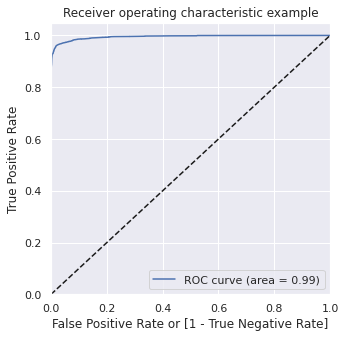

In [140]:
# Predicted probability
y_train_pred_proba_rf = rf_model.predict_proba(X_train_smote)[:,1]

# Plotting the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_rf)

In [141]:
#Model evaluation on test data set
y_test_pred = rf_model.predict(X_test_cv)
display_model_scores(y_test_cv, y_test_pred)

Model Precision score: 0.1.
Model Recall score: 0.86
Model F1 Score: 0.18
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.10      0.86      0.18        98

    accuracy                           0.99     56961
   macro avg       0.55      0.92      0.58     56961
weighted avg       1.00      0.99      0.99     56961



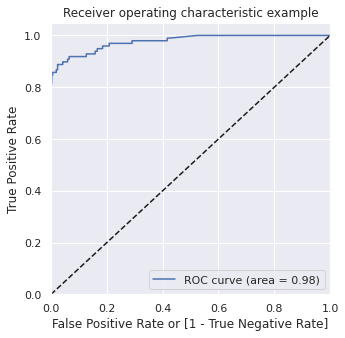

In [142]:
# Predicted probability
y_test_pred_proba_rf = rf_model.predict_proba(X_test_cv)[:,1]

draw_roc(y_test_cv, y_test_pred_proba_rf)

### XGBoost on balanced data with SMOTE

In [143]:
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9],
             'max_depth': range(5, 15, 5),
             'verbosity': [0]}          


xgb_model = XGBClassifier(n_estimators=200)

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missin...
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                           

In [144]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_subsample,param_verbosity,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,83.588633,0.402305,0.322119,0.007846,0.2,5,0.3,0,"{'learning_rate': 0.2, 'max_depth': 5, 'subsam...",0.999989,0.999994,0.999991,0.999991,0.000002,10,1.0,1.0,1.0,1.0,1.143163e-09
1,129.488808,0.151866,0.316466,0.002888,0.2,5,0.6,0,"{'learning_rate': 0.2, 'max_depth': 5, 'subsam...",0.999987,0.999994,0.999996,0.999992,0.000004,9,1.0,1.0,1.0,1.0,0.000000e+00
2,164.212384,0.231326,0.313793,0.001795,0.2,5,0.9,0,"{'learning_rate': 0.2, 'max_depth': 5, 'subsam...",0.999985,0.999990,0.999995,0.999990,0.000004,11,1.0,1.0,1.0,1.0,0.000000e+00
3,111.031948,0.453972,0.507303,0.021621,0.2,10,0.3,0,"{'learning_rate': 0.2, 'max_depth': 10, 'subsa...",0.999994,0.999996,0.999996,0.999995,0.000001,1,1.0,1.0,1.0,1.0,4.100385e-11
4,160.602884,0.610562,0.512170,0.033221,0.2,10,0.6,0,"{'learning_rate': 0.2, 'max_depth': 10, 'subsa...",0.999989,0.999991,0.999997,0.999992,0.000004,8,1.0,1.0,1.0,1.0,0.000000e+00
5,198.759105,1.057523,0.489333,0.001760,0.2,10,0.9,0,"{'learning_rate': 0.2, 'max_depth': 10, 'subsa...",0.999988,0.999994,0.999997,0.999993,0.000004,6,1.0,1.0,1.0,1.0,0.000000e+00
6,65.568732,0.339927,0.295121,0.003439,0.6,5,0.3,0,"{'learning_rate': 0.6, 'max_depth': 5, 'subsam...",0.999997,0.999993,0.999991,0.999994,0.000003,5,1.0,1.0,1.0,1.0,0.000000e+00
7,95.782149,0.718434,0.303798,0.002703,0.6,5,0.6,0,"{'learning_rate': 0.6, 'max_depth': 5, 'subsam...",0.999989,0.999996,0.999998,0.999994,0.000004,4,1.0,1.0,1.0,1.0,0.000000e+00
8,118.241191,0.622892,0.311150,0.005896,0.6,5,0.9,0,"{'learning_rate': 0.6, 'max_depth': 5, 'subsam...",0.999988,0.999994,0.999997,0.999993,0.000004,7,1.0,1.0,1.0,1.0,0.000000e+00
9,69.862883,1.466534,0.325712,0.004026,0.6,10,0.3,0,"{'learning_rate': 0.6, 'max_depth': 10, 'subsa...",0.999989,0.999986,0.999991,0.999988,0.000002,12,1.0,1.0,1.0,1.0,6.409876e-17


In [145]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999952971677333
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=0)


In [146]:
model_cv.best_params_

{'learning_rate': 0.2, 'max_depth': 10, 'subsample': 0.3, 'verbosity': 0}

#### XGBOOST with hyperparameters obtained from above on SMOTE data set

In [147]:
params = {'learning_rate': model_cv.best_params_['learning_rate'],
          'max_depth': model_cv.best_params_['max_depth'], 
          'n_estimators':200,
          'subsample':model_cv.best_params_['subsample'],
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 10,
                      'n_estimators': 200, 'objective': 'binary:logistic',
                      'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [148]:
#Evaluaing on train data set
y_train_pred = xgb_smote_model.predict(X_train_smote)
display_model_scores(y_train_smote, y_train_pred)

Model Precision score: 1.0.
Model Recall score: 1.0
Model F1 Score: 1.0
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227452
           1       1.00      1.00      1.00    227452

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



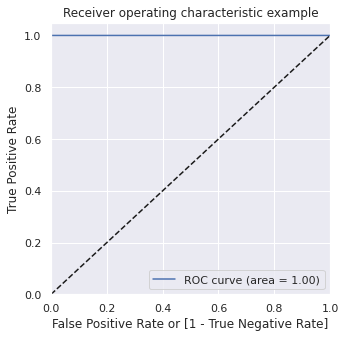

In [149]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [150]:
#Evaluating on test data set
y_pred = xgb_smote_model.predict(X_test_cv)
display_model_scores(y_test_cv, y_pred)

Model Precision score: 0.75.
Model Recall score: 0.85
Model F1 Score: 0.8
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.85      0.80        98

    accuracy                           1.00     56961
   macro avg       0.88      0.92      0.90     56961
weighted avg       1.00      1.00      1.00     56961



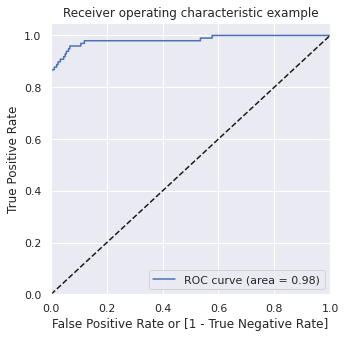

In [151]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test_cv)[:,1]
# Plot the ROC curve
draw_roc(y_test_cv, y_test_pred_proba)

#### Choosing XGBOOST as best model among the different model trained on SMOTE balanced data set as we got AUC_ROC and RECALL as 1 and ROC_AUC as 98 , recall 0.85 in Test data

Top var = 14
2nd Top var = 4
3rd Top var = 12


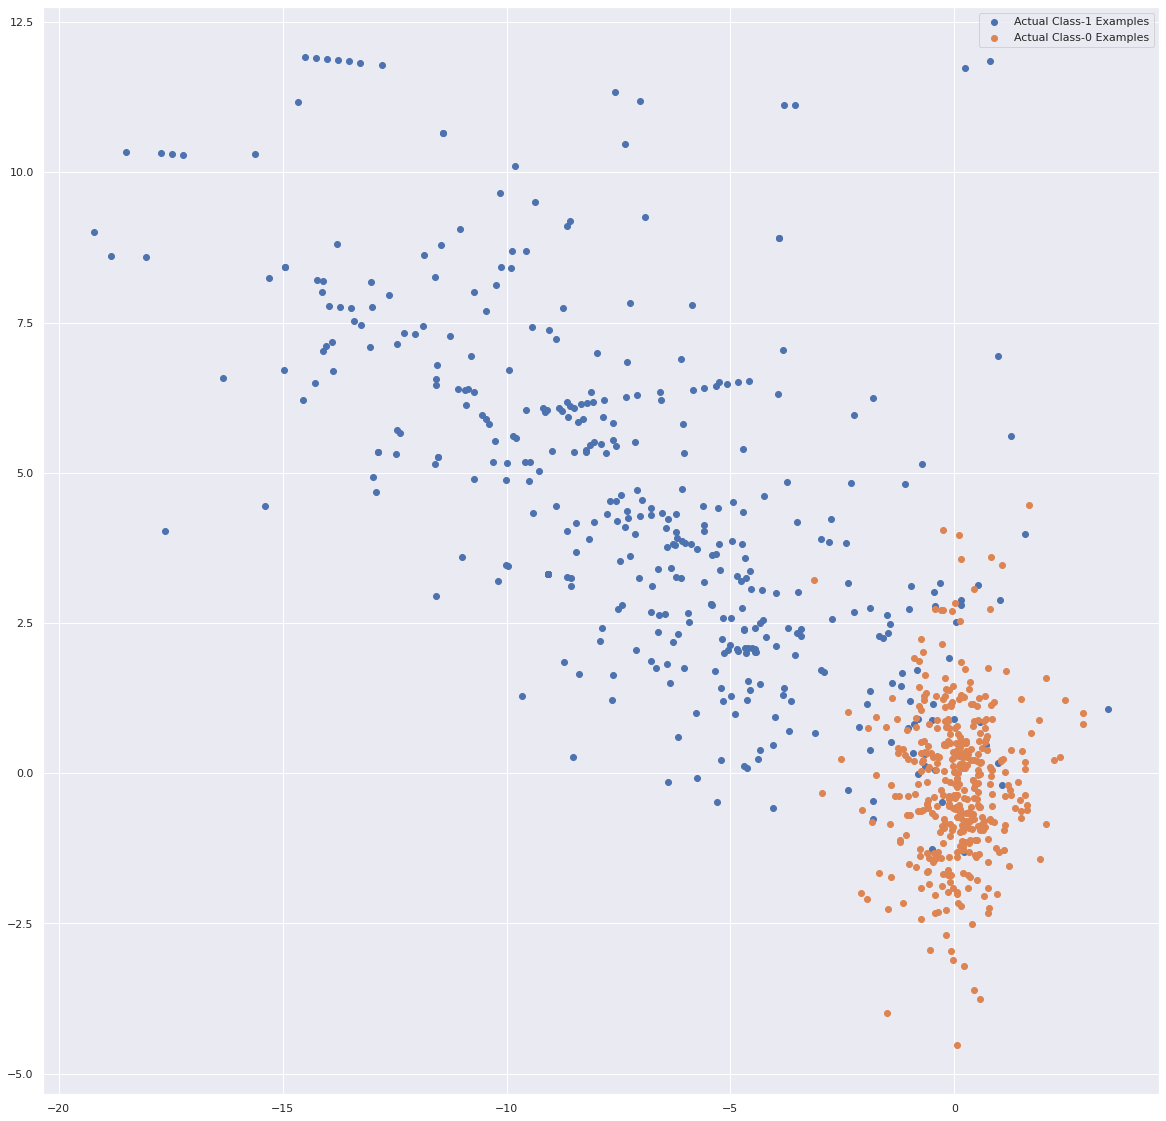

In [152]:
var_imp = []
for i in xgb_smote_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_smote_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_smote_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_smote_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_smote_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_smote_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [153]:
#### Print the FPR,TPR & select the best threshold from the roc curve
print('Train auc =', metrics.roc_auc_score(y_train_pred, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 1.0
0.96049577


### Print the class distribution after applying ADASYN

In [154]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


In [155]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5,shuffle = True ,random_state=42)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ada = over_sampling.ADASYN(random_state=42)
    X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_cv, y_train_cv)
  
#Creating Dataframe 
X_train_adasyn = pd.DataFrame(data=X_train_adasyn,   columns=cols)

In [156]:
print('Before sampling class of distribution:-',Counter(y_train_cv))
print('New class of distribution:-',Counter(y_train_adasyn))

Before sampling class of distribution:- Counter({0: 227452, 1: 394})
New class of distribution:- Counter({1: 227461, 0: 227452})


### Logistic Regression on ADASYN data

In [157]:
# Creating StratifiedKFold object with 5 splits
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fitting the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
print('Best ROC AUC score: ', model_cv.best_score_)
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9798673053963565
Best hyperparameters:  {'C': 0.01}


In [158]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.477084,0.222500,0.052435,0.000627,0.01,{'C': 0.01},0.979119,0.979536,0.979699,0.980568,...,0.979867,0.000545,1,0.979335,0.979459,0.980092,0.980385,0.980121,0.979878,0.000408
1,8.710431,0.370093,0.052350,0.002187,0.1,{'C': 0.1},0.979182,0.980089,0.977929,0.979033,...,0.979234,0.000771,6,0.979446,0.980026,0.978288,0.978854,0.979617,0.979246,0.000610
2,8.694484,0.388420,0.051793,0.001488,1,{'C': 1},0.978786,0.979231,0.978723,0.980433,...,0.979592,0.000857,3,0.979049,0.979199,0.979053,0.980259,0.980572,0.979626,0.000654
3,8.702817,0.287906,0.054569,0.006558,10,{'C': 10},0.979483,0.978484,0.979293,0.979674,...,0.979378,0.000498,5,0.979663,0.978463,0.979665,0.979531,0.979622,0.979389,0.000465
4,8.806696,0.359917,0.051164,0.001263,100,{'C': 100},0.979443,0.980298,0.979505,0.979750,...,0.979784,0.000310,2,0.979648,0.980169,0.979886,0.979619,0.979623,0.979789,0.000215
5,8.730875,0.440658,0.051699,0.001142,1000,{'C': 1000},0.978590,0.979671,0.979786,0.980533,...,0.979514,0.000674,4,0.978918,0.979525,0.980189,0.980374,0.978668,0.979535,0.000673


In [159]:
model_cv.best_params_

{'C': 0.01}

#### Logistic Regression with hyperparameter on ADASYN data

In [160]:
C = model_cv.best_params_['C']
# Instantiating the model
logreg_adasyn_model = LogisticRegression(C=C)

# Fitting the model 
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=0.01)

In [161]:
# Evaluating on train  data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)
display_model_scores(y_train_adasyn, y_train_pred)

Model Precision score: 0.95.
Model Recall score: 0.9
Model F1 Score: 0.93
Model Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93    227452
           1       0.95      0.90      0.93    227461

    accuracy                           0.93    454913
   macro avg       0.93      0.93      0.93    454913
weighted avg       0.93      0.93      0.93    454913



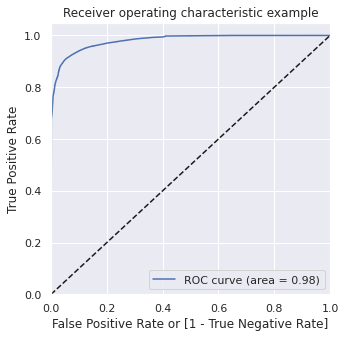

In [162]:
# Predicted probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [163]:
# Evaluating on test data
y_pred = logreg_adasyn_model.predict(X_test_cv)
display_model_scores(y_test_cv, y_pred)

Model Precision score: 0.03.
Model Recall score: 0.89
Model F1 Score: 0.06
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     56863
           1       0.03      0.89      0.06        98

    accuracy                           0.95     56961
   macro avg       0.52      0.92      0.52     56961
weighted avg       1.00      0.95      0.97     56961



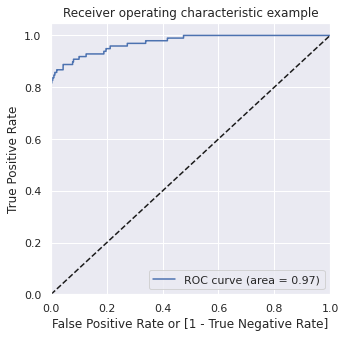

In [164]:
# Predicted probability
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test_cv)[:,1]

# Plot the ROC curve
draw_roc(y_test_cv, y_test_pred_proba)

##### Build models on other algorithms to see the better performing on ADASYN

### Decision Tree on balanced data with ADASYN

In [165]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = folds, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [166]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9973345974295251
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [167]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}

#### Decision Tree with hyperparameter on ADASYN data

In [168]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=grid_search.best_params_['max_depth'], 
                                  min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                  min_samples_split=grid_search.best_params_['min_samples_split'])

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=42)

In [169]:
# Evaluating on Train data set
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
display_model_scores(y_train_adasyn, y_train_pred)

Model Precision score: 0.98.
Model Recall score: 0.99
Model F1 Score: 0.99
Model Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    227452
           1       0.98      0.99      0.99    227461

    accuracy                           0.99    454913
   macro avg       0.99      0.99      0.99    454913
weighted avg       0.99      0.99      0.99    454913



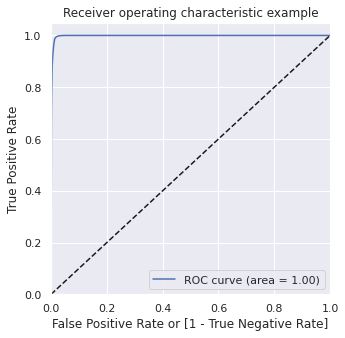

In [170]:
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plotting the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [171]:
y_pred = dt_adasyn_model.predict(X_test_cv)
display_model_scores(y_test_cv, y_pred)

Model Precision score: 0.08.
Model Recall score: 0.86
Model F1 Score: 0.14
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.08      0.86      0.14        98

    accuracy                           0.98     56961
   macro avg       0.54      0.92      0.57     56961
weighted avg       1.00      0.98      0.99     56961



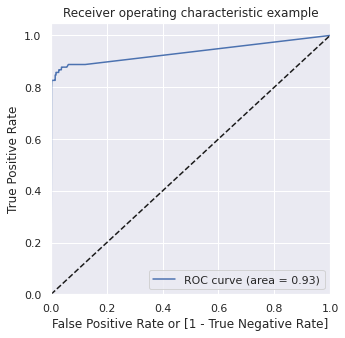

In [172]:
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test_cv)[:,1]
# Plotting the ROC curve
draw_roc(y_test_cv, y_test_pred_proba)

###  Random Forest  on ADASYN data

In [173]:
folds = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
param_grid = {
    'min_samples_leaf': range(50, 150, 50),
    'max_depth': range(5, 15, 5),
    'min_samples_split': range(50, 150, 50), 
    'max_features': [10, 20]
}
rf_model = RandomForestClassifier(n_estimators = 100)
grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = param_grid, 
                           cv = folds,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score = True)

grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             return_train_score=True, verbose=1)

In [174]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,186.337777,1.407464,1.895987,0.045130,5,10,50,50,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.947929,0.945251,0.946590,0.001339,13,0.948803,0.945264,0.947034,0.001769
1,184.760848,0.452532,1.879439,0.025257,5,10,50,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.946113,0.945176,0.945645,0.000468,14,0.947282,0.945168,0.946225,0.001057
2,186.027926,1.735384,2.860422,0.815005,5,10,100,50,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.944508,0.944389,0.944449,0.000059,16,0.945352,0.944535,0.944943,0.000409
3,185.763971,0.691971,1.985965,0.061307,5,10,100,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.944205,0.945163,0.944684,0.000479,15,0.944455,0.944860,0.944658,0.000202
4,363.671068,2.300242,1.863216,0.019075,5,20,50,50,"{'max_depth': 5, 'max_features': 20, 'min_samp...",0.954268,0.956959,0.955613,0.001345,11,0.955112,0.957821,0.956466,0.001354
5,362.205786,5.227990,1.869368,0.008276,5,20,50,100,"{'max_depth': 5, 'max_features': 20, 'min_samp...",0.959192,0.958656,0.958924,0.000268,9,0.959491,0.959271,0.959381,0.000110
6,363.803379,0.804213,1.824624,0.045723,5,20,100,50,"{'max_depth': 5, 'max_features': 20, 'min_samp...",0.954462,0.959311,0.956886,0.002425,10,0.954967,0.960036,0.957502,0.002535
7,363.796217,2.678929,1.882578,0.006349,5,20,100,100,"{'max_depth': 5, 'max_features': 20, 'min_samp...",0.954967,0.950241,0.952604,0.002363,12,0.955561,0.950694,0.953127,0.002433
8,326.458338,2.157466,2.630819,0.066642,10,10,50,50,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.994874,0.994935,0.994905,0.000031,1,0.995322,0.995428,0.995375,0.000053
9,329.266992,4.110285,2.642896,0.060586,10,10,50,100,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.994803,0.994764,0.994784,0.000020,2,0.995164,0.995089,0.995127,0.000037


In [175]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9949045202725881
RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)


In [176]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 50}

#### Random Forest with Hyperparameter on ADASYN data

In [177]:
# model with the best hyperparameters
rf_model = RandomForestClassifier(bootstrap = True,
                             max_depth = grid_search.best_params_['max_depth'] ,
                             min_samples_leaf = grid_search.best_params_['min_samples_leaf'], 
                             min_samples_split = grid_search.best_params_['min_samples_split'],
                             max_features = grid_search.best_params_['max_features'],
                             n_estimators = 100)
rf_model.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

In [178]:
#Model evaluation on train data set
y_train_pred = rf_model.predict(X_train_adasyn)

display_model_scores(y_train_adasyn, y_train_pred)

Model Precision score: 0.99.
Model Recall score: 1.0
Model F1 Score: 1.0
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    227452
           1       0.99      1.00      1.00    227461

    accuracy                           1.00    454913
   macro avg       1.00      1.00      1.00    454913
weighted avg       1.00      1.00      1.00    454913



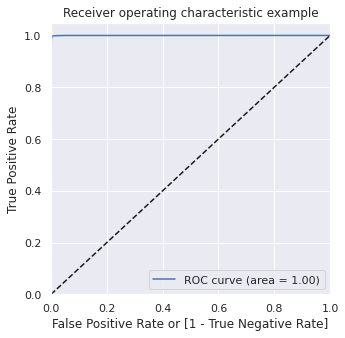

In [179]:
# Predicted probability
y_train_pred_proba_rf = rf_model.predict_proba(X_train_adasyn)[:,1]

# Plotting the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba_rf)

In [180]:
#Model evaluation on test data set
y_test_pred = rf_model.predict(X_test_cv)
display_model_scores(y_test_cv, y_test_pred)

Model Precision score: 0.16.
Model Recall score: 0.85
Model F1 Score: 0.26
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.16      0.85      0.26        98

    accuracy                           0.99     56961
   macro avg       0.58      0.92      0.63     56961
weighted avg       1.00      0.99      0.99     56961



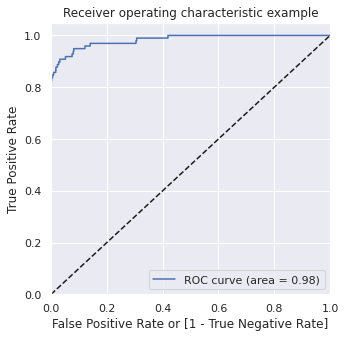

In [181]:
# Predicted probability
y_test_pred_proba_rf = rf_model.predict_proba(X_test_cv)[:,1]

draw_roc(y_test_cv, y_test_pred_proba_rf)

###  XGBoost on balanced data with ADASYN 

In [184]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9],
             'max_depth': range(5, 15, 5),
             'verbosity': [0]}  

xgb_model = XGBClassifier(n_estimators=100)

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missin...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                           

In [185]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_subsample,param_verbosity,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,54.535959,0.298459,0.131261,0.011463,0.2,5,0.3,0,"{'learning_rate': 0.2, 'max_depth': 5, 'subsam...",0.999970,...,0.999967,0.000009,12,0.999993,0.999984,0.999994,0.999992,0.999986,0.999990,3.798057e-06
1,84.551684,0.246052,0.120702,0.001593,0.2,5,0.6,0,"{'learning_rate': 0.2, 'max_depth': 5, 'subsam...",0.999965,...,0.999967,0.000012,11,0.999997,0.999994,0.999996,0.999997,0.999993,0.999995,1.702745e-06
2,107.412349,0.310838,0.119786,0.001149,0.2,5,0.9,0,"{'learning_rate': 0.2, 'max_depth': 5, 'subsam...",0.999966,...,0.999970,0.000011,10,0.999997,0.999996,0.999995,0.999996,0.999997,0.999996,4.814191e-07
3,87.933788,0.243292,0.204926,0.006331,0.2,10,0.3,0,"{'learning_rate': 0.2, 'max_depth': 10, 'subsa...",0.999987,...,0.999993,0.000004,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.179381e-09
4,133.470526,0.491872,0.206442,0.002838,0.2,10,0.6,0,"{'learning_rate': 0.2, 'max_depth': 10, 'subsa...",0.999988,...,0.999994,0.000004,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,168.441789,0.782469,0.201701,0.002142,0.2,10,0.9,0,"{'learning_rate': 0.2, 'max_depth': 10, 'subsa...",0.999988,...,0.999991,0.000007,8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
6,49.551559,0.344128,0.121910,0.000691,0.6,5,0.3,0,"{'learning_rate': 0.6, 'max_depth': 5, 'subsam...",0.999975,...,0.999989,0.000010,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.871498e-10
7,76.633272,0.416443,0.123131,0.001759,0.6,5,0.6,0,"{'learning_rate': 0.6, 'max_depth': 5, 'subsam...",0.999980,...,0.999992,0.000008,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
8,96.715778,0.216753,0.121161,0.000819,0.6,5,0.9,0,"{'learning_rate': 0.6, 'max_depth': 5, 'subsam...",0.999981,...,0.999992,0.000008,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.965068e-17
9,61.100294,1.309051,0.160702,0.003682,0.6,10,0.3,0,"{'learning_rate': 0.6, 'max_depth': 10, 'subsa...",0.999975,...,0.999993,0.000009,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.174487e-10


In [186]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999958790920843
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=0)


In [187]:
model_cv.best_params_

{'learning_rate': 0.6, 'max_depth': 10, 'subsample': 0.6, 'verbosity': 0}

#### XGBOOST with hyperparameter on ADASYN data

In [188]:
# chosen hyperparameters
params = {'learning_rate': model_cv.best_params_['learning_rate'],
          'max_depth': model_cv.best_params_['max_depth'], 
          'n_estimators': 100,
          'subsample':model_cv.best_params_['subsample'],
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 10,
                      'n_estimators': 100, 'objective': 'binary:logistic',
                      'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [189]:
# Evaluating on train data set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
# Printing the scores
display_model_scores(y_train_adasyn, y_train_pred)

Model Precision score: 1.0.
Model Recall score: 1.0
Model F1 Score: 1.0
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227452
           1       1.00      1.00      1.00    227461

    accuracy                           1.00    454913
   macro avg       1.00      1.00      1.00    454913
weighted avg       1.00      1.00      1.00    454913



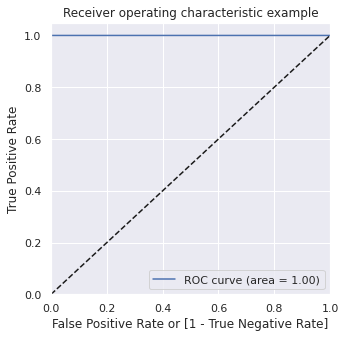

In [190]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [193]:
# Evaluating on Test data set
y_pred = xgb_adasyn_model.predict(X_test)
display_model_scores(y_test, y_pred)

Model Precision score: 0.74.
Model Recall score: 0.83
Model F1 Score: 0.78
Model Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.74      0.83      0.78        98

    accuracy                           1.00     56961
   macro avg       0.87      0.91      0.89     56961
weighted avg       1.00      1.00      1.00     56961



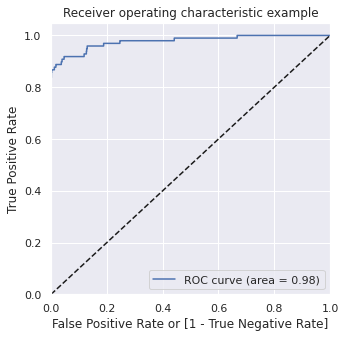

In [194]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Selecting XGBOOST as best model on balanced data using ADASYN 

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


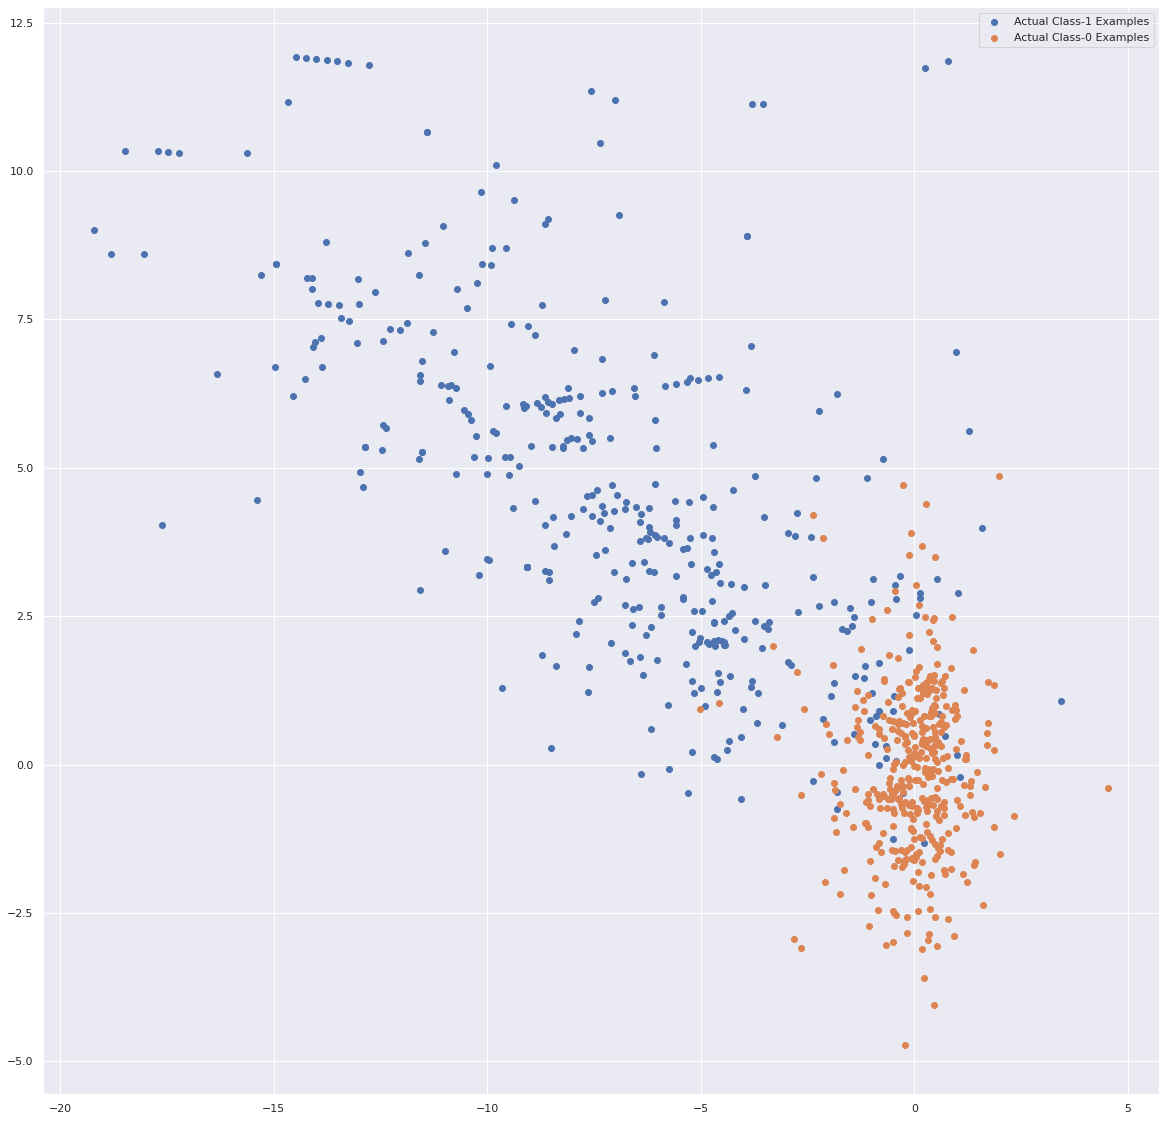

In [195]:
var_imp = []
for i in xgb_adasyn_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [196]:
print('Train auc =', metrics.roc_auc_score(y_train_pred, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 1.0
0.9548378


**We have found that 95.48% is the threshold for which TPR is the highest and FPR is the lowest and we get 100% ROC score on the train data.**



In [206]:
target = 'Class'
features_x = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
             'Amount']

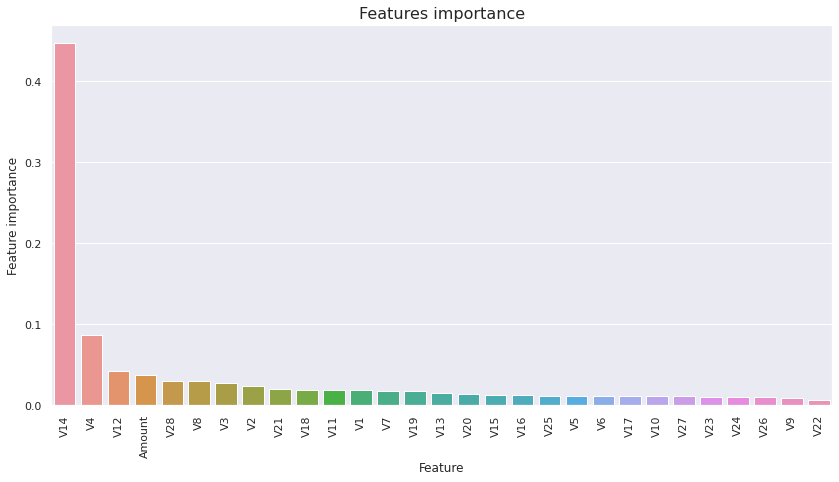

In [208]:
tmp_df = pd.DataFrame({'Feature': features_x, 'Feature importance': xgb_adasyn_model.feature_importances_})
tmp_sort = tmp_df.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (14,7))
plt.title('Features importance',fontsize=16)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp_sort)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

**Inference:**
From the above feature importance figure we can say that PCA converted variables like V14, V4 are able to explain the maximum variance and hence we can target these variables to detect a fraud.

### Summary

The data set consisted of Highly class imbalanced data , different models such as Logistic Regression, Decision Tree, Random Forest, XGBOOST were build on Unbalanced data, Random OverSampled data, SMOTE data, ADASYN data using Hyperparameter tuning

Model Evaluation was done using ROC AUC value along with Recall and Precision

For banks with a smaller average transaction value, you would want a high precision because you only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, you can add the human element to verify whether the transaction was made by calling the customer. However, when the precision is low such tasks are a burden because the human element has to be increased.


For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So, consider the losses if the missed transaction was a high-value fraudulent one, for example, a transaction of $10,000?



Here, to save banks from high-value fraudulent transactions,
**we will be focusing on a high recall to detect actual fraudulent transactions.**

Benefits of ADASYN technique
- It lowers the bias introduced by the class imbalance.
- It adaptively shifts the classification decision boundary towards difficult examples.

After performing several models, we see that balanced dataset with ADASYN technique the XGBOOST model  with hyperparameter tuning gives us the good results.
- Model Accuracy: 1
- ROC AUC (train): 1
- Recall: 1
- Precision: 1
- Threshold : 0.9548
